# Carga de paquetes

In [1]:
from torch.optim import Adam
from torchvision import transforms
from torch.utils.data import  DataLoader, ConcatDataset

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import os
import pylab as pl
from IPython import display
import nibabel
from ICPRpreprocessing import * 

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# CARGA DE DATOS

In [2]:
BASE_PATH = os.getcwd() + "\\ICPR"
TRAINING_PATH= BASE_PATH + "\\train\\"

TEST_PATH= BASE_PATH + "/test/"

# DICCIONARIO TRAINING Y TEST

In [3]:
TRAINING_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "pathsT2":[],
    "mask" :[]
}
createDictionary(TRAINING_PATH, TRAINING_DICT)
print(TRAINING_DICT.get("pathsFLAIR").__getitem__(0))
print(TRAINING_DICT.get("pathsT1").__getitem__(0))
print(TRAINING_DICT.get("pathsT2").__getitem__(0))
print(TRAINING_DICT.get("mask").__getitem__(0))
print(len(TRAINING_DICT.get("pathsFLAIR")))

c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPR\train\P1\T1\P1_T1_FLAIR.nii.gz
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPR\train\P1\T1\P1_T1_T1.nii.gz
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPR\train\P1\T1\P1_T1_T2.nii.gz
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPR\train\P1\T1\P1_T1_MASK.nii.gz
93


In [4]:
TEST_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "pathsT2":[],
    "mask" :[],
}
createDictionary(TEST_PATH, TEST_DICT)
print(TEST_DICT.get("pathsFLAIR").__getitem__(0))
print(TEST_DICT.get("pathsT1").__getitem__(0))
print(TEST_DICT.get("pathsT2").__getitem__(0))
print(TEST_DICT.get("mask").__getitem__(0))

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR/test/'

# Crear dataset entrenamiento y test

In [4]:
train,val=divideDataset(TRAINING_DICT,0.8)
print("total training FLAIR images", len(train.__getitem__("pathsFLAIR")))
print("total test FLAIR images", len(val.__getitem__("pathsFLAIR")))

total training FLAIR images 74
total test FLAIR images 19


In [5]:
print(val)

{'pathsFLAIR': ['c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P52\\T1\\P52_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P34\\T1\\P34_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P9\\T2\\P9_T2_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P7\\T2\\P7_T2_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P8\\T1\\P8_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P4\\T3\\P4_T3_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P43\\T1\\P43_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P20\\T2\\P20_T2

In [4]:
train,val = getIDs(TRAINING_DICT)
print(val)
print(len(val.__getitem__("pathsFLAIR")))

{'pathsFLAIR': ['c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P10\\T1\\P10_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P10\\T2\\P10_T2_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P11\\T2\\P11_T2_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P2\\T1\\P2_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P2\\T4\\P2_T4_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P20\\T3\\P20_T3_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P25\\T1\\P25_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P3\\T3\\P3_

In [5]:
train,val=getIDs(TRAINING_DICT)
print("total training FLAIR images", len(train.__getitem__("pathsFLAIR")))
print("total test FLAIR images", len(val.__getitem__("pathsFLAIR")))

total training FLAIR images 74
total test FLAIR images 19


In [5]:
print(val)

{'pathsFLAIR': ['c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P10\\T1\\P10_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P10\\T2\\P10_T2_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P11\\T2\\P11_T2_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P2\\T1\\P2_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P2\\T4\\P2_T4_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P20\\T3\\P20_T3_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P25\\T1\\P25_T1_FLAIR.nii.gz', 'c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation\\ICPR\\train\\P3\\T3\\P3_

# Preprocesamiento 

-   Cropping and padding
- obtiene region cerebral, se rellenan los huecos que pueda haber, se normaliza con gaussian normalization
- las imágenes finales tienen 2 canales ya que ponen una encima de la otra T1 Y FLAIR
- removing skull


(-0.5, 199.5, 199.5, -0.5)

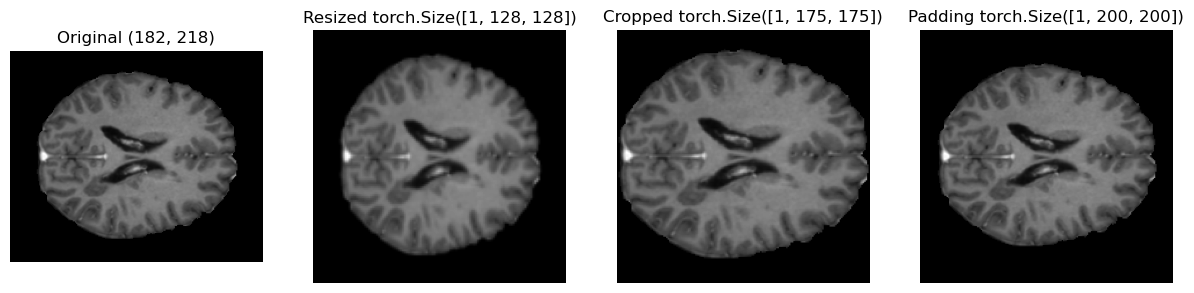

In [23]:
fig,axs = plt.subplots(1, 4, figsize=(15,5))
flair= os.path.join(TRAINING_PATH, "P1","T1","P1_T1_T1.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,91]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')

image_res=add_transformation(image_data[:, :, 91],128, True, False)
axs[1].imshow(image_res.squeeze(0), cmap='gray')
axs[1].set_title("Resized %s" %(image_res.shape,))
axs[1].axis('off')

image_crop=add_transformation(image_data[:, :, 91],175, False,False)
axs[2].imshow(image_crop.squeeze(0), cmap='gray')
axs[2].set_title("Cropped %s" %(image_crop.shape,))
axs[2].axis('off')

image_pad=add_transformation(image_data[:, :, 91],200, False,False)
axs[3].imshow(image_pad.squeeze(0), cmap='gray')
axs[3].set_title("Padding %s" %(image_pad.shape,))
axs[3].axis('off')


(-0.5, 217.5, 181.5, -0.5)

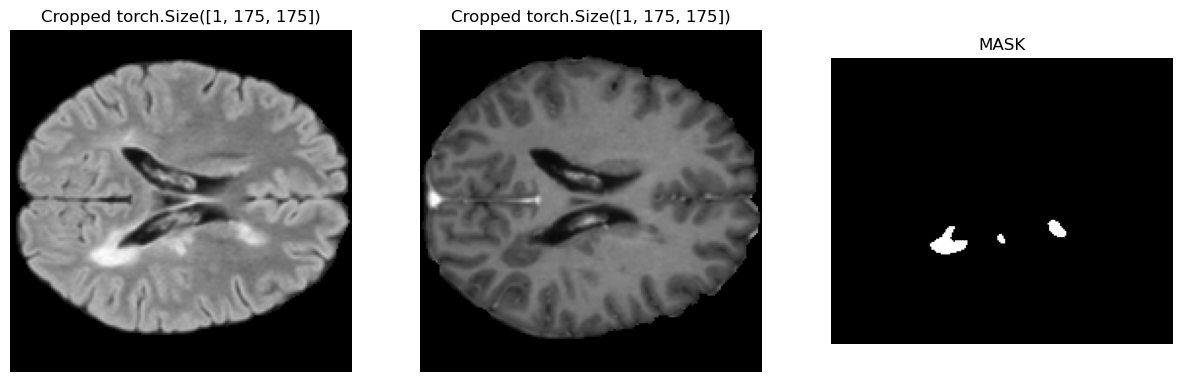

In [13]:
fig,axs = plt.subplots(1, 3, figsize=(15,5))
flair= os.path.join(TRAINING_PATH, "P1","T1","P1_T1_FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_crop=add_transformation(image_data[:, :, 91],175, False,False)
axs[0].imshow(image_crop.squeeze(0), cmap='gray')
axs[0].set_title("Cropped %s" %(image_crop.shape,))
axs[0].axis('off')

flair= os.path.join(TRAINING_PATH, "P1","T1","P1_T1_T1.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_crop=add_transformation(image_data[:, :, 91],175, False,False)
axs[1].imshow(image_crop.squeeze(0), cmap='gray')
axs[1].set_title("Cropped %s" %(image_crop.shape,))
axs[1].axis('off')

mask= os.path.join(TRAINING_PATH, "P1","T1","P1_T1_MASK.nii.gz")
img = nib.load(mask)
image_data = img.get_fdata() 

axs[2].imshow(image_data[:, :,91], cmap='gray')
axs[2].set_title("MASK")
axs[2].axis('off')

# Concatenar imágenes

In [14]:
fig,axs = plt.subplots(1, 3, figsize=(15,5))
flair= os.path.join(TRAINING_PATH, "P1","T1","P1_T1_FLAIR.nii.gz")
t1=os.path.join(TRAINING_PATH, "P1","T1","P1_T1_T1.nii.gz")
t2=os.path.join(TRAINING_PATH, "P1","T1","P1_T1_T2.nii.gz")

fl = nibabel.load(flair)
fl_data = fl.get_fdata()[:,:,91] 
t=nibabel.load(t1)
t_data=t.get_fdata()[:,:,91] 

l=nibabel.load(t2)
l_data=l.get_fdata()[:,:,91] 

image_orig=numpy.concatenate((t_data[...,np.newaxis],fl_data[...,np.newaxis],l_data[...,np.newaxis]), axis=2)
axs[0].imshow(image_orig[...,0], cmap='gray')
axs[0].set_title("T1 %s" %(image_orig.shape,))
axs[0].axis('off')

axs[1].imshow(image_orig[...,1], cmap='gray')
axs[1].set_title("FLAIR %s" %(image_orig.shape,))
axs[1].axis('off')

axs[2].imshow(image_orig[...,2], cmap='gray')
axs[2].set_title("T1 %s" %(image_orig.shape,))
axs[2].axis('off')

(-0.5, 217.5, 181.5, -0.5)

## Brain Filling &  Normalización

(-0.5, 217.5, 181.5, -0.5)

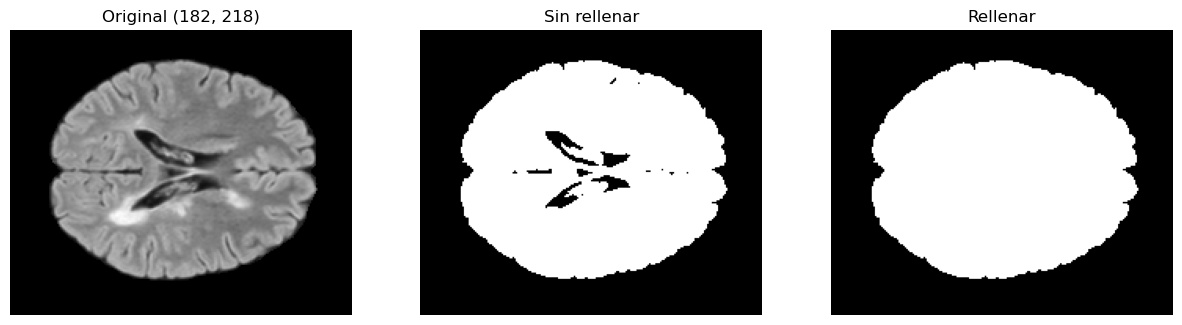

In [15]:
fig,axs = plt.subplots(1, 3, figsize=(15,5))
flair= os.path.join(TRAINING_PATH, "P1","T1","P1_T1_FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,91]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')


mask= brainMask(image_orig)
axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Sin rellenar")
axs[1].axis('off')


mask= brainfilling(mask)
axs[2].imshow(mask, cmap='gray')
axs[2].set_title("Rellenar")
axs[2].axis('off')


In [16]:

fig,axs = plt.subplots(1, 3, figsize=(15,5))
flair= os.path.join(TRAINING_PATH,"P1","T1","P1_T1_FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,91]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')
mask_tensor= transforms.ToTensor()(mask)
image_res=gaussian_normalizationFILL(transforms.ToTensor()(image_data[:, :, 91]), mask_tensor)
axs[1].imshow(image_res.squeeze(0), cmap='gray')
axs[1].set_title("Gaussian Normalization %s" %(image_res.shape,))
axs[1].axis('off')

image_crop=minmax_normalizationFILL(transforms.ToTensor()(image_data[:, :, 91]), mask_tensor)
axs[2].imshow(image_crop.squeeze(0), cmap='gray')
axs[2].set_title("MinMax %s" %(image_crop.shape,))
axs[2].axis('off')

(-0.5, 217.5, 181.5, -0.5)

# MÉTODOS ENTRENAMIENTO

In [6]:
from unet import UNet 
use_cuda = True
torch.manual_seed(33)

if use_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
model = UNet(in_channels=1,out_channels=1, init_features=32)
model=model.to(device)

In [7]:
def traintestpipeline(epochs: int, optim: Adam, criterion: DiceLoss, min_loss: int, name: str):
    t_loss = np.zeros((epochs))
    v_loss = np.zeros((epochs))
    pbar = tqdm(range(1, epochs+1)) # tdqm permet tenir text dinàmic
    for epoch in pbar:
        
        train_loss = 0 
        val_loss = 0  
        
        model.train()                                                  
        for batch_num, (input_img, target) in enumerate(train_dl, 1):   
        

            input_img= input_img.to(device).float()
            target = target.to(device).float()
            
            
            output = model(input_img)
            loss = criterion(output, target)
            loss.backward()                                            
            optim.step()                                               
            optim.zero_grad()     
            
            train_loss += loss.item()    
                                                        
        model.eval()   
        with torch.no_grad():                                          
            for input_img, target in val_dl: 
                input_img = input_img.to(device).float()
                target = target.to(device)
                
                output = model(input_img)                                   
                loss = criterion(output, target)   
                val_loss += loss.item()  
        
        # RESULTATS
        train_loss /= len(train_dl)
        t_loss[epoch-1] = train_loss
        
        val_loss /= len(val_dl)   
        v_loss[epoch-1] = val_loss
        if(v_loss[epoch-1]<min_loss):
            min_loss=v_loss[epoch-1]
            torch.save(model.state_dict(), name)  
        # VISUALITZACIO DINAMICA
        plt.figure(figsize=(12, 4))
        pl.plot(t_loss[:epoch], label="train")
        pl.plot(v_loss[:epoch], label="validation")
        pl.legend()
        pl.xlim(0, epochs)
        pl.xticks(range(0,epochs,1),range(1,epochs+1,1))
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        plt.close()

        pbar.set_description(f"Epoch:{epoch} Training Loss:{train_loss} Validation Loss:{val_loss}")

- dice coefficient
- hausdorf distance
- precision
- accuracy
- Intersection over Union(IOU)

- Average volume difference (in percentage)
- Sensitivity for individual lesions (recall)
-  F1-score for individual lesions

https://medium.com/@nghihuynh_37300/understanding-evaluation-metrics-in-medical-image-segmentation-d289a373a3f 

In [8]:
def precision_score(pred_mask,groundtruth_mask):
    intersect = torch.sum(pred_mask*groundtruth_mask)
    total_pixel_pred = torch.sum(pred_mask)
    precision = torch.mean(intersect/total_pixel_pred)
    return precision

def recall_score(pred_mask, groundtruth_mask):
    intersect = torch.sum(pred_mask*groundtruth_mask)
    total_pixel_truth = torch.sum(groundtruth_mask)
    if(torch.all(total_pixel_truth==0)):
        recall= torch.tensor(0.0)
    else:    
        recall = torch.mean(intersect/total_pixel_truth)
    return recall

def accuracy(pred_mask,groundtruth_mask):
    intersect = torch.sum(pred_mask*groundtruth_mask)
    union = torch.sum(pred_mask) + torch.sum(groundtruth_mask) - intersect
    xor = torch.sum(groundtruth_mask==pred_mask)
    acc = torch.mean(xor/(union + xor - intersect))
    return acc

def iou_score(pred_mask, groundtruth_mask):
    intersect = torch.sum(pred_mask*groundtruth_mask)
    union = torch.sum(pred_mask) + torch.sum(groundtruth_mask) - intersect
    iou = torch.mean(intersect/union)
    return iou
def dice_coeff(y_true, y_pred):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    
    y_true_f = y_true_f.float()
    y_pred_f = y_pred_f.float()
    
    intersection = torch.sum(y_true_f * y_pred_f)
    union = torch.sum(y_true_f) + torch.sum(y_pred_f)
    
    dice_coeff = (2. * intersection) / union
    
    return dice_coeff

https://github.com/Project-MONAI/MONAI/discussions/2179 problema con HausdorffDistance

In [9]:
import torch
from monai.metrics import DiceMetric, HausdorffDistanceMetric, get_mask_edges, get_surface_distance

def calculate_metrics(model, test_dl, device):
    model.eval()
    # total_dice = 0
    # total_hd = 0
    # total_pre = 0
    # total_rec = 0
    # total_acc = 0
    # total_iou=0
    # total = len(test_dl)

    total_dice = torch.tensor(0.0, device=device)
    total_hd = torch.tensor(0.0, device=device)
    total_pre = torch.tensor(0.0, device=device)
    total_rec = torch.tensor(0.0, device=device)
    total_acc = torch.tensor(0.0, device=device)
    total_iou = torch.tensor(0.0, device=device)
    total = len(test_dl)

    dice_metric = DiceMetric(include_background=True, reduction="mean")
    hd_metric = HausdorffDistanceMetric(include_background=True, reduction="mean")

    with torch.no_grad():
        for input_img, target in test_dl:
            input_img = input_img.to(device).float()
            target = target.to(device).float()

            output = model(input_img)

            dice = dice_coeff(output, target)
            #dice = np.nan_to_num(dice.cpu().numpy())
            total_dice += dice.mean()

            # if(torch.all(target==0) or torch.all(output==0)):
            #     hd= torch.tensor(1.0)     
            # else:    
            #     hd = hd_metric(output, target)
            #     hd = np.nan_to_num(hd.cpu().numpy())
            # total_hd += hd.mean()
        
           
            # Compute confusion matrix
            #confusion_matrix = get_confusion_matrix(pred_binary, target)
            pre = precision_score(output, target)
            total_pre+=pre

            rec = recall_score(output, target)
            total_rec+=rec

            acc = accuracy(output, target)
            total_acc+=acc

            iou = iou_score(output, target)
            total_iou+=iou
            


    total_dice /= total
    total_hd /= total
    total_pre /=total
    total_rec /=total
    total_acc /=total
    total_iou /= total
    print("Dice coefficient:", total_dice)
    print("IOU:", total_iou)
    print("Hausdorff Distance:", total_hd)
    print("Precision:", total_pre)
    print("Recall:", total_rec)
    print("Accuracy:", total_acc)


In [10]:
def assignPretrainedModel(device,name:str):
    mmodel =  model.to(device)
    mmodel.load_state_dict(torch.load(name))
    mmodel.eval();
    return mmodel

## Modelo con todo el conjunto de imágenes

In [14]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,False)

13468
3458


In [29]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/NODeletion128FLAIR.pt")

Epoch:65 Training Loss:0.5694815422219529 Validation Loss:0.8956838484814674: 100%|██████████| 65/65 [2:31:08<00:00, 139.52s/it]


In [24]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/NODeletion128FLAIR.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: tensor(0.1174, device='cuda:0')
IOU: tensor(0.0784, device='cuda:0')
Hausdorff Distance: tensor(0., device='cuda:0')
Precision: tensor(0.2212, device='cuda:0')
Recall: tensor(0.2130, device='cuda:0')
Accuracy: tensor(0.5996, device='cuda:0')


In [25]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,30,False)

13468
3458


In [32]:
epochs = 35
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/NODeletion128T1.pt")

Epoch:35 Training Loss:0.8183627520212883 Validation Loss:0.9577369738901811: 100%|██████████| 35/35 [1:22:15<00:00, 141.01s/it]


In [26]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/NODeletion128T1.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: tensor(0.0615, device='cuda:0')
IOU: tensor(0.0370, device='cuda:0')
Hausdorff Distance: tensor(0., device='cuda:0')
Precision: tensor(0.0842, device='cuda:0')
Recall: tensor(0.0646, device='cuda:0')
Accuracy: tensor(0.6849, device='cuda:0')


In [27]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT2",train,val,transform, transform_label,False,30,False)

13468
3458


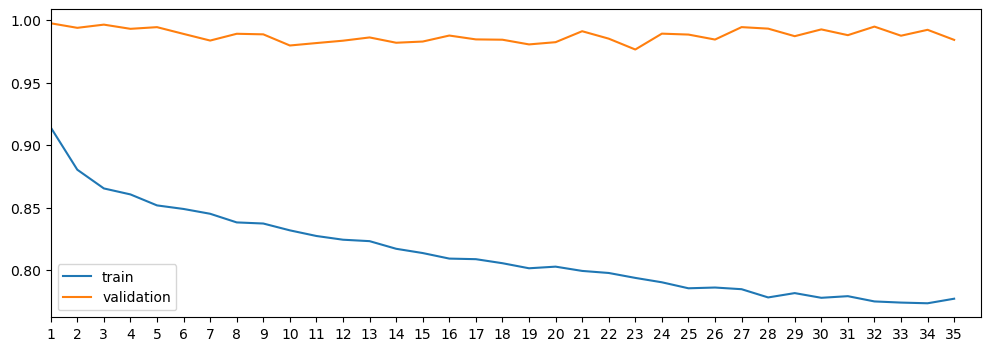

Epoch:35 Training Loss:0.7770765691929246 Validation Loss:0.9841754383733783: 100%|██████████| 35/35 [1:21:40<00:00, 140.02s/it]


In [34]:
epochs = 35
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/NODeletion128T2.pt")

In [28]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/NODeletion128T2.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: tensor(0.0235, device='cuda:0')
IOU: tensor(0.0126, device='cuda:0')
Hausdorff Distance: tensor(0., device='cuda:0')
Precision: tensor(0.0363, device='cuda:0')
Recall: tensor(0.0281, device='cuda:0')
Accuracy: tensor(0.4209, device='cuda:0')


# Modelo sin el 20% de los slices:

In [29]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,True)

10681
2736


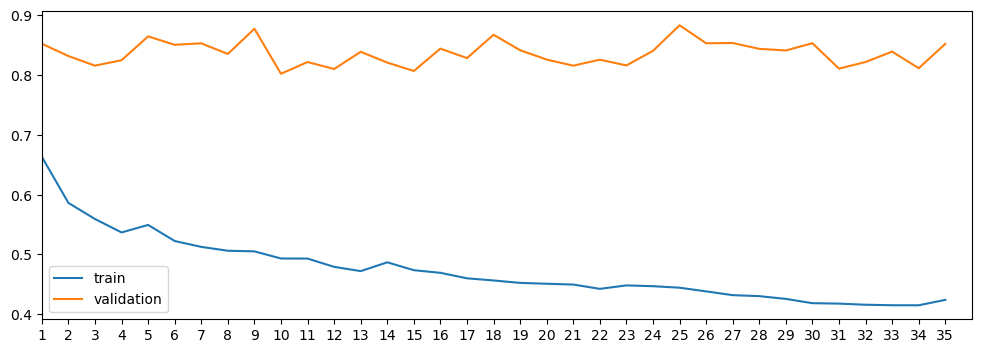

Epoch:35 Training Loss:0.42415494194217757 Validation Loss:0.8517084869600922: 100%|██████████| 35/35 [1:03:51<00:00, 109.48s/it]


In [36]:
epochs = 35
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/Deletion128FLAIR.pt")

In [30]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/Deletion128FLAIR.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: tensor(0.1982, device='cuda:0')
IOU: tensor(0.1327, device='cuda:0')
Hausdorff Distance: tensor(0., device='cuda:0')
Precision: tensor(0.2770, device='cuda:0')
Recall: tensor(0.3176, device='cuda:0')
Accuracy: tensor(0.7652, device='cuda:0')


In [31]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,30,True)

10681
2736


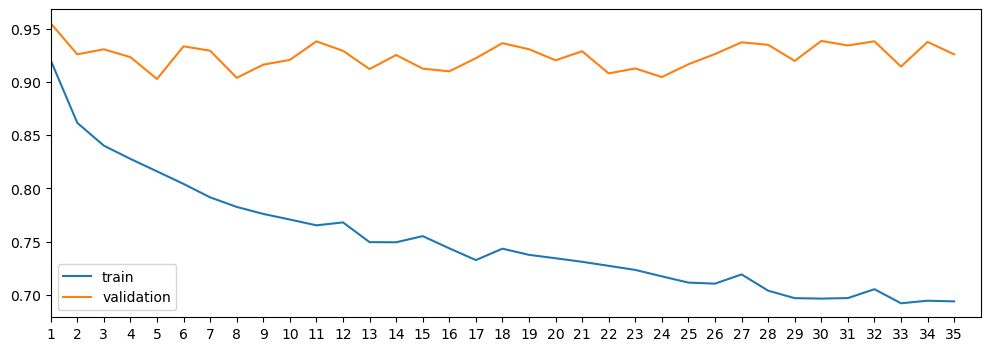

Epoch:35 Training Loss:0.6938283747317744 Validation Loss:0.9258909383604066: 100%|██████████| 35/35 [1:04:06<00:00, 109.91s/it]


In [38]:
epochs = 35
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/Deletion128T1.pt")

In [32]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/Deletion128T1.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: tensor(0.0972, device='cuda:0')
IOU: tensor(0.0591, device='cuda:0')
Hausdorff Distance: tensor(0., device='cuda:0')
Precision: tensor(0.0896, device='cuda:0')
Recall: tensor(0.1420, device='cuda:0')
Accuracy: tensor(0.9684, device='cuda:0')


In [33]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT2",train,val,transform, transform_label,False,30,True)

10681
2736


In [40]:
epochs = 35
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/Deletion128T2.pt")

Epoch:35 Training Loss:0.6558987446525851 Validation Loss:0.9235341466627757: 100%|██████████| 35/35 [1:04:23<00:00, 110.37s/it]


In [34]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/Deletion128T2.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: tensor(0.0824, device='cuda:0')
IOU: tensor(0.0491, device='cuda:0')
Hausdorff Distance: tensor(0., device='cuda:0')
Precision: tensor(0.0739, device='cuda:0')
Recall: tensor(0.1744, device='cuda:0')
Accuracy: tensor(0.9160, device='cuda:0')


# Modelos con Resize 

MEJOR SIN SLICES

## 128x128 

In [35]:
transform, transform_label=transform_setter(128,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)

10681
2736


In [42]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/RESIZE/Resize128FLAIR.pt")

Epoch:65 Training Loss:0.4504853135907466 Validation Loss:0.8595146821017458: 100%|██████████| 65/65 [2:05:35<00:00, 115.93s/it]


In [36]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/RESIZE/Resize128FLAIR.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: tensor(0.1715, device='cuda:0')
IOU: tensor(0.1170, device='cuda:0')
Hausdorff Distance: tensor(0., device='cuda:0')
Precision: tensor(0.2158, device='cuda:0')
Recall: tensor(0.3080, device='cuda:0')
Accuracy: tensor(0.9609, device='cuda:0')


In [ ]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)

In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/RESIZE/Resize128T1.pt")

In [ ]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/RESIZE/Resize128T1.pt")
calculate_metrics(model,val_dl, device)

In [ ]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT2",train,val,transform, transform_label,False,15,True)

In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/RESIZE/Resize128T2.pt")

In [ ]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/RESIZE/Resize128T2.pt")
calculate_metrics(model,val_dl, device)

## 180X180

In [12]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is180=True)
model=model.to(device)

In [13]:
transform, transform_label=transform_setter(180,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)

10681
2736


In [14]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/RESIZE/Resize180FLAIR.pt")

  0%|          | 0/65 [02:11<?, ?it/s]


KeyboardInterrupt: 

In [14]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/RESIZE/Resize180FLAIR.pt")
calculate_metrics(model,val_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.11010502938634568
IOU: tensor(0.1228, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.2360, device='cuda:0')
Recall: tensor(0.3239, device='cuda:0')
Accuracy: tensor(0.0823, device='cuda:0')


In [12]:
transform, transform_label=transform_setter(182,True)

In [13]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label, False,15,True)


2311
514


In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/RESIZE/Resize182T1.pt")

In [16]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/RESIZE/Resize182T1.pt")
calculate_metrics(model,val_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.04208037649529471
IOU: tensor(0.0810, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.1765, device='cuda:0')
Recall: tensor(0.1163, device='cuda:0')
Accuracy: tensor(0.2848, device='cuda:0')


## 224 x 224

In [11]:
model = UNet(in_channels=1,out_channels=1, init_features=32)
model=model.to(device)

In [12]:
transform, transform_label=transform_setter(224,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)

10681
2736


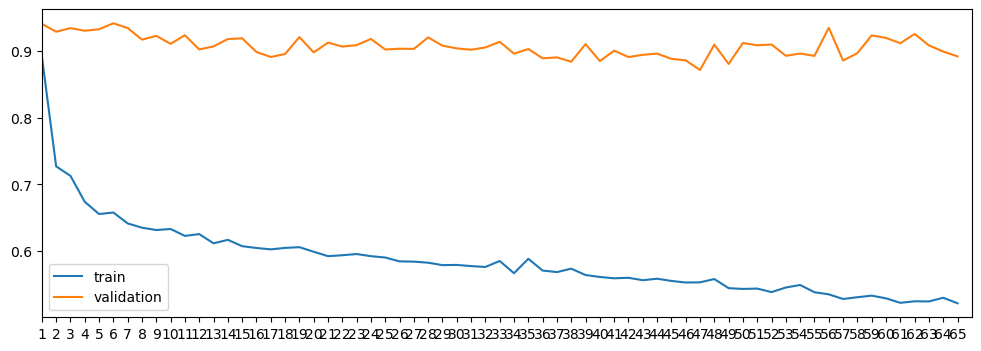

Epoch:65 Training Loss:0.5218317988544159 Validation Loss:0.8919252375689458: 100%|██████████| 65/65 [5:44:24<00:00, 317.92s/it]


In [13]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/RESIZE/Resize224FLAIR.pt")

In [13]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/RESIZE/Resize224FLAIR.pt")
calculate_metrics(model,val_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.1021411144058986
IOU: tensor(0.1312, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.2579, device='cuda:0')
Recall: tensor(0.2932, device='cuda:0')
Accuracy: tensor(0.0945, device='cuda:0')


## 200 x 200

In [45]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=True,is200crop=False)
model=model.to(device)

In [46]:
transform, transform_label=transform_setter(200,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)

10681
2736


In [47]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/RESIZE/Resize200FLAIRpad.pt")

Epoch:65 Training Loss:0.5230156866230102 Validation Loss:0.9281510827073322: 100%|██████████| 65/65 [4:32:28<00:00, 251.52s/it]


In [57]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/RESIZE/Resize200FLAIRpad.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: 0.1063150693883041
IOU: tensor(0.1350, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.2351, device='cuda:0')
Recall: tensor(0.2703, device='cuda:0')
Accuracy: tensor(0.0890, device='cuda:0')


In [48]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=False,is200crop=True)
model=model.to(device)

In [49]:
transform, transform_label=transform_setter(200,True)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)

10681
2736


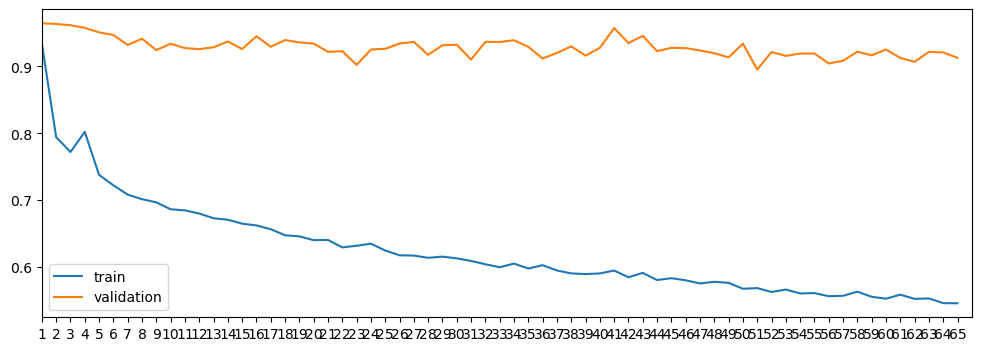

Epoch:65 Training Loss:0.5460030776755506 Validation Loss:0.9129315408177123: 100%|██████████| 65/65 [4:58:47<00:00, 275.81s/it]


In [50]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/RESIZE/Resize200FLAIRcrop.pt")

In [42]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/RESIZE/Resize200FLAIRcrop.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: 0.07373305033926092
IOU: tensor(0.1294, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.2705, device='cuda:0')
Recall: tensor(0.2376, device='cuda:0')
Accuracy: tensor(0.0618, device='cuda:0')


# Modelos con Crop/Pad

## 200 x 200

Seg´´un si va mejor crop o pad dentro de la unet seleccionar modelo correspondiente y entrenar

In [71]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=True,is200crop=False)
model=model.to(device)

In [72]:
transform, transform_label=transform_setter(200,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)

10681
2736


In [13]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/CROP/Crop200FLAIR.pt")

Epoch:65 Training Loss:0.356797121801684 Validation Loss:0.4239862683547691: 100%|██████████| 65/65 [58:24<00:00, 53.92s/it]  


In [14]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/CROP/Crop200FLAIR.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.19305790315970386
IOU: tensor(0.3189, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.4872, device='cuda:0')
Recall: tensor(0.3992, device='cuda:0')
Accuracy: tensor(0.2431, device='cuda:0')


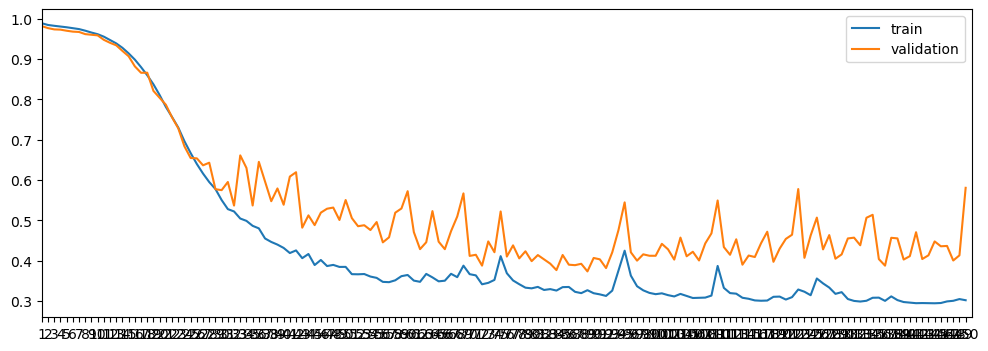

Epoch:150 Training Loss:0.30175396742359284 Validation Loss:0.580506386354822: 100%|██████████| 150/150 [2:18:16<00:00, 55.31s/it]


In [13]:
epochs = 150
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop200FLAIR150.pt")

In [14]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop200FLAIR150.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.2281009573759021
IOU: tensor(0.3269, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.4711, device='cuda:0')
Recall: tensor(0.4322, device='cuda:0')
Accuracy: tensor(0.2755, device='cuda:0')


## 224 x224

In [14]:
model = UNet(in_channels=1,out_channels=1, init_features=32)
model=model.to(device)

In [15]:
transform, transform_label=transform_setter(224,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)

10681
2736


In [16]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/CROP/Crop224FLAIR.pt")

Epoch:100 Training Loss:0.4174173707547395 Validation Loss:0.8085724803540169: 100%|██████████| 100/100 [8:46:17<00:00, 315.78s/it]


In [18]:
model=assignPretrainedModel(device,"./ICPRModelos3DUNET/CROP/Crop224FLAIR.pt")
calculate_metrics(model,val_dl, device)

Dice coefficient: 0.17758836261560454
IOU: tensor(0.3371, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.5163, device='cuda:0')
Recall: tensor(0.4119, device='cuda:0')
Accuracy: tensor(0.2312, device='cuda:0')


## 180x180

In [ ]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=False,is200crop=True)
model=model.to(device)

In [22]:
transform, transform_label=transform_setter(180,False)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label, False,15,True)

2311
514


In [23]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/CROP/Crop180FLAIR.pt")

Epoch:100 Training Loss:0.306595306627212 Validation Loss:0.4084804055300735: 100%|██████████| 100/100 [2:25:22<00:00, 87.23s/it]


In [24]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop180FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2074568337408556
IOU: tensor(0.3480, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.5175, device='cuda:0')
Recall: tensor(0.4505, device='cuda:0')
Accuracy: tensor(0.4506, device='cuda:0')


In [25]:
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


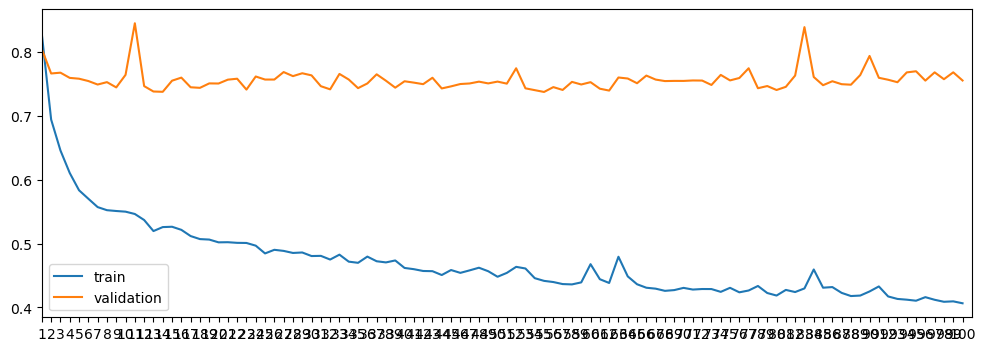

Epoch:100 Training Loss:0.40637190341949464 Validation Loss:0.7556499802766355: 100%|██████████| 100/100 [2:21:27<00:00, 84.88s/it]


In [26]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/CROP/Crop256T1.pt")

In [64]:
model=assignPretrainedModel(device,"./Modelos3DUNET/CROP/Crop256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.0
IOU: tensor(0.0887, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(0.1813, device='cuda:0')
Recall: tensor(0.1354, device='cuda:0')
Accuracy: tensor(0.7025, device='cuda:0')


# Modelos con Normalizacion

Se asume un tamaño con Reize de 256x256(pendiente resultados)
Se asume un tamaño con Crop and Pad de 200x200(pendiente resultados)

## Gaussian Normalization Resize 256x256

- 1: Gaussian normalization
- 3: Gaussian Normalization cerebro
- 5: gaussian normalization del cerebro completo

In [32]:
transform, transform_label=transform_normalization(256,True,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)

2311
514


In [66]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256FLAIR.pt")

Epoch:65 Training Loss:0.4272668588546015 Validation Loss:0.4873324878069564: 100%|██████████| 65/65 [1:30:44<00:00, 83.76s/it]


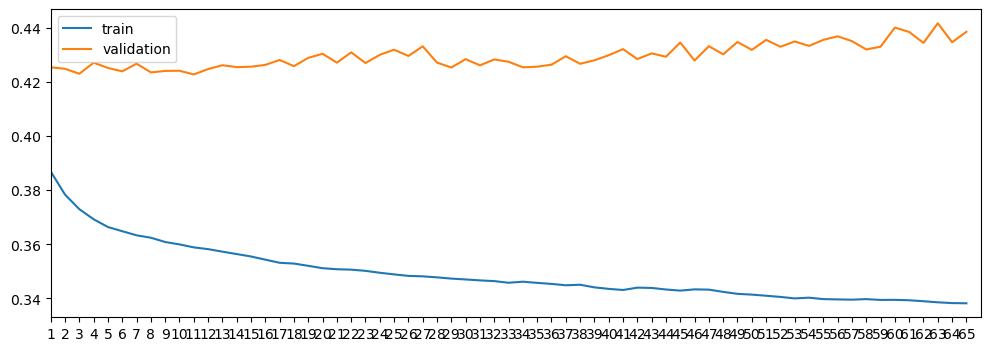

Epoch:65 Training Loss:0.3382336228124557 Validation Loss:0.4384429684066739: 100%|██████████| 65/65 [1:32:00<00:00, 84.94s/it]  


In [33]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256FLAIRlr4.pt")

In [35]:
epochs = 65
optim = Adam(model.parameters(), lr=0.0002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256FLAIR0002.pt")

Epoch:65 Training Loss:0.3336930840246139 Validation Loss:0.4382088737084471: 100%|██████████| 65/65 [1:32:08<00:00, 85.06s/it]


In [67]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.0
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.5413, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [34]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256FLAIRlr4.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2421939703721651
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4226, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [36]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256FLAIR0002.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.2543888839353856
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4431, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [12]:
transform, transform_label=transform_normalization(256,True,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


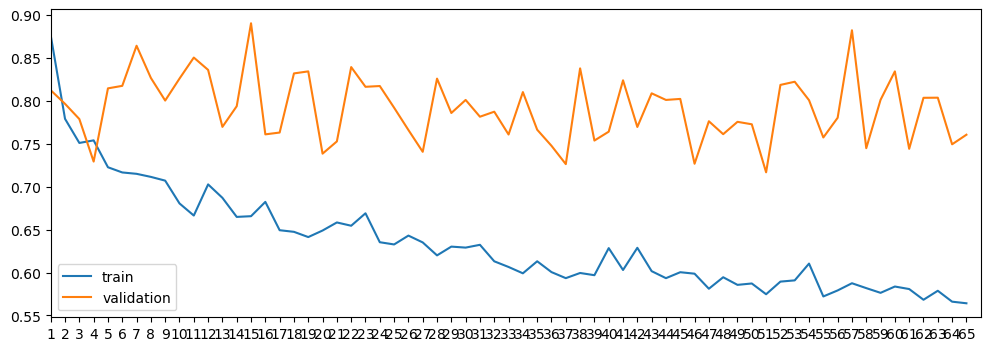

Epoch:65 Training Loss:0.5642118923125728 Validation Loss:0.7602484778189346: 100%|██████████| 65/65 [1:30:49<00:00, 83.84s/it]


In [69]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256T1.pt")

In [70]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.0
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


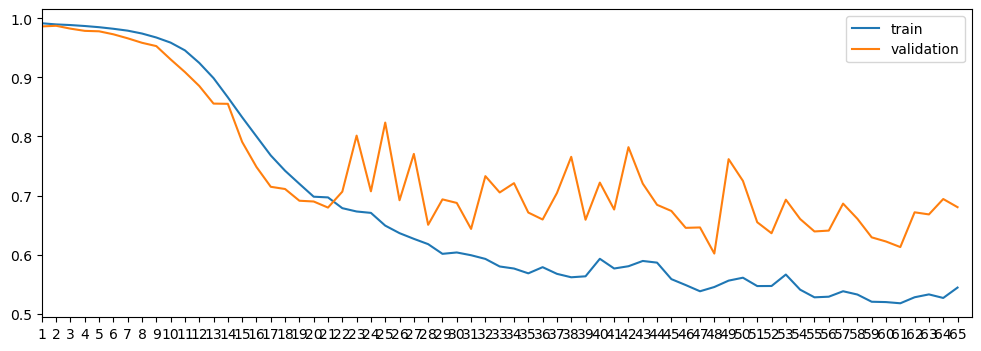

Epoch:65 Training Loss:0.5441224467369818 Validation Loss:0.6802565043309204: 100%|██████████| 65/65 [1:34:31<00:00, 87.25s/it]


In [13]:
epochs = 65
optim = Adam(model.parameters(), lr=0.0002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GN256T10002.pt")

In [14]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GN256T10002.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.1432589104029926
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [28]:
transform, transform_label=transform_normalization(256,True,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


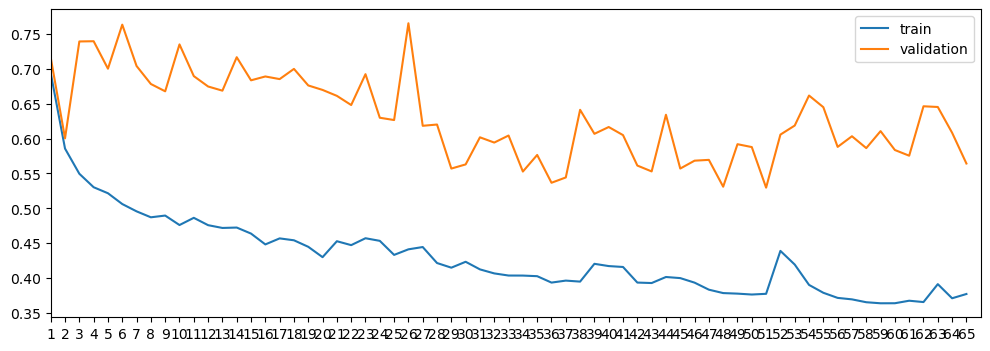

Epoch:65 Training Loss:0.37719703220552014 Validation Loss:0.5641914617834536: 100%|██████████| 65/65 [1:39:33<00:00, 91.90s/it]


In [16]:
epochs = 65
optim = Adam(model.parameters(), lr=0.0002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNMask256FLAIR.pt")

In [17]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNMask256FLAIR.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.15502504040012258
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3832, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [29]:
epochs = 65
optim = Adam(model.parameters(), lr=0.00002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNMask256FLAIR02.pt")

Epoch:65 Training Loss:0.3198143866754347 Validation Loss:0.5193960256768566: 100%|██████████| 65/65 [1:37:11<00:00, 89.72s/it]


In [30]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNMask256FLAIR02.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2096182477660477
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3899, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [31]:
transform, transform_label=transform_normalization(256,True,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


In [32]:
epochs = 65
optim = Adam(model.parameters(), lr=0.00002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNMask256T1.pt")

Epoch:65 Training Loss:0.4144139209101277 Validation Loss:0.6821408153823545: 100%|██████████| 65/65 [1:37:07<00:00, 89.65s/it]


In [34]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNMask256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.10643091979773568
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [35]:
transform, transform_label=transform_normalization(256,True,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


In [36]:
epochs = 65
optim = Adam(model.parameters(), lr=0.00002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNFill256FLAIR.pt")

Epoch:65 Training Loss:0.3103890288260675 Validation Loss:0.509324172941598: 100%|██████████| 65/65 [1:43:13<00:00, 95.29s/it] 


In [37]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNFill256FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.22209602917029866
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3966, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [38]:
transform, transform_label=transform_normalization(256,True,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


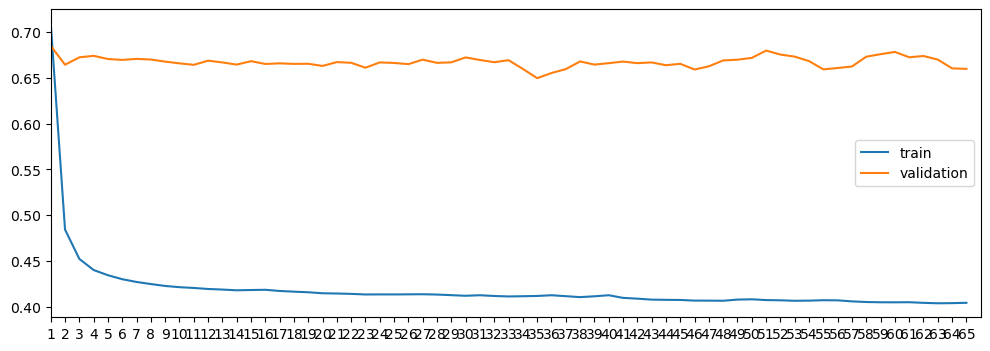

Epoch:65 Training Loss:0.4043501788570035 Validation Loss:0.6597213724539239: 100%|██████████| 65/65 [1:43:33<00:00, 95.59s/it]


In [39]:
epochs = 65
optim = Adam(model.parameters(), lr=0.00002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_RESIZE/GNFill256T1.pt")

In [40]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_RESIZE/GNFill256T1.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.11995184526068012
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


## MINMAX NORMALIZATION RESIZE 256X256

- 2: min max normalization
- 4: min max del cerebro
- 6: minmax del cerebro entero

In [23]:
transform, transform_label=transform_normalization(256,True,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


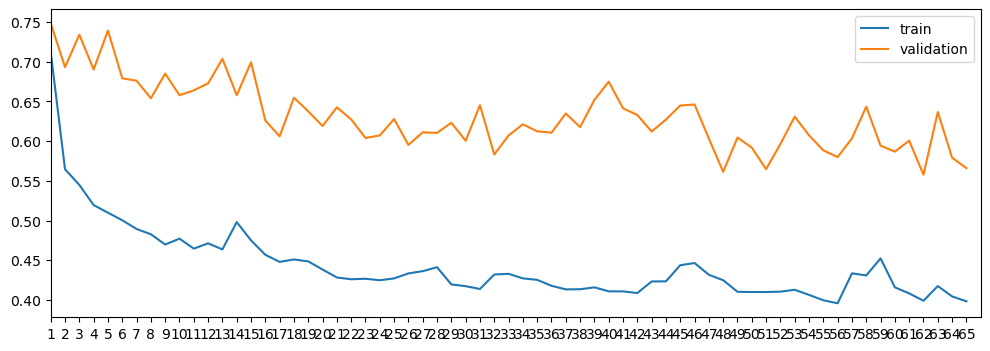

Epoch:65 Training Loss:0.3981597081307442 Validation Loss:0.5659934205133423: 100%|██████████| 65/65 [1:31:41<00:00, 84.64s/it] 


In [24]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MM256FLAIR.pt")

In [25]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MM256FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.20378756729187444
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3933, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [26]:
transform, transform_label=transform_normalization(256,True,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


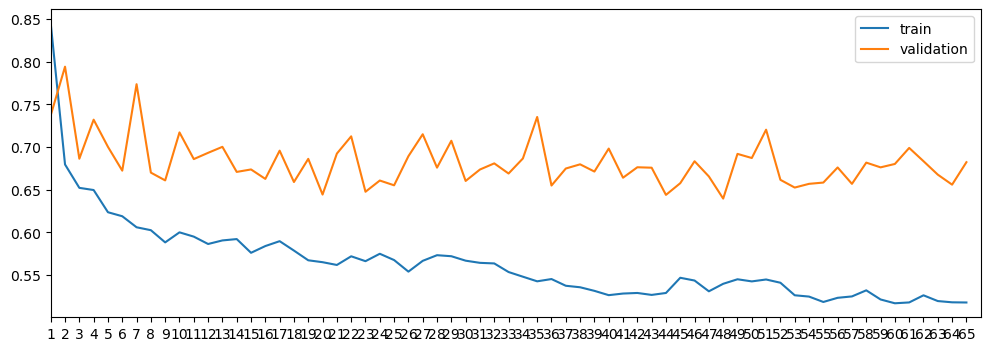

Epoch:65 Training Loss:0.5180127297678302 Validation Loss:0.6822154394175631: 100%|██████████| 65/65 [1:33:06<00:00, 85.94s/it]


In [27]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MM256T1.pt")

In [28]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MM256T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.1234064128672655
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [29]:
transform, transform_label=transform_normalization(256,True,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


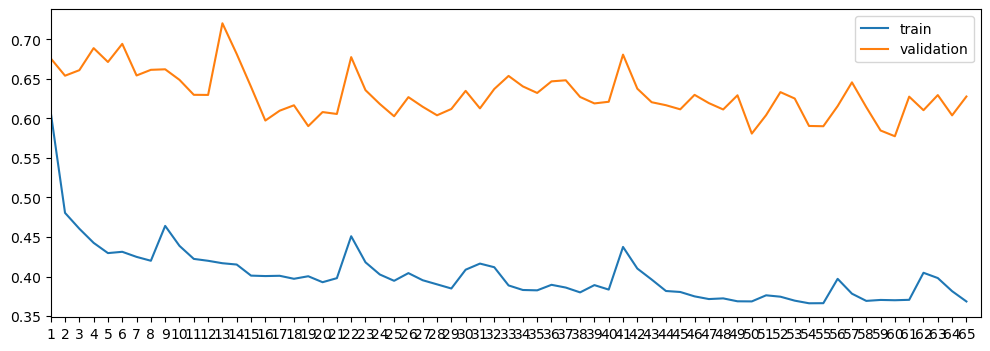

Epoch:65 Training Loss:0.3684891123925486 Validation Loss:0.6276373443359524: 100%|██████████| 65/65 [1:37:48<00:00, 90.28s/it]


In [30]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MMmask256FLAIR.pt")

In [31]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MMmask256FLAIR.pt")
calculate_metrics(model,test_dl, device)

RuntimeError: min(): Expected reduction dim to be specified for input.numel() == 0. Specify the reduction dim with the 'dim' argument.

In [ ]:
transform, transform_label=transform_normalization(256,True,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MMmask256T1.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MMmask256T1.pt")
calculate_metrics(model,test_dl, device)

In [ ]:
transform, transform_label=transform_normalization(256,True,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MMFill256FLAIR.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE//MMFill256FLAIR.pt")
calculate_metrics(model,test_dl, device)

In [ ]:
transform, transform_label=transform_normalization(256,True,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_RESIZE/MMFill200T1.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_RESIZE/MMFill200T1.pt")
calculate_metrics(model,test_dl, device)

## Gaussian Normalization CropandPad 200x200

In [11]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=True,is200crop=False)
model= model.to(device)

In [11]:
transform, transform_label=transform_normalization(200,False,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)

10681
2736


In [12]:
m,d = calc_mean_std(train_dl)
print(m)
print(d)

tensor(nan)
tensor(nan)


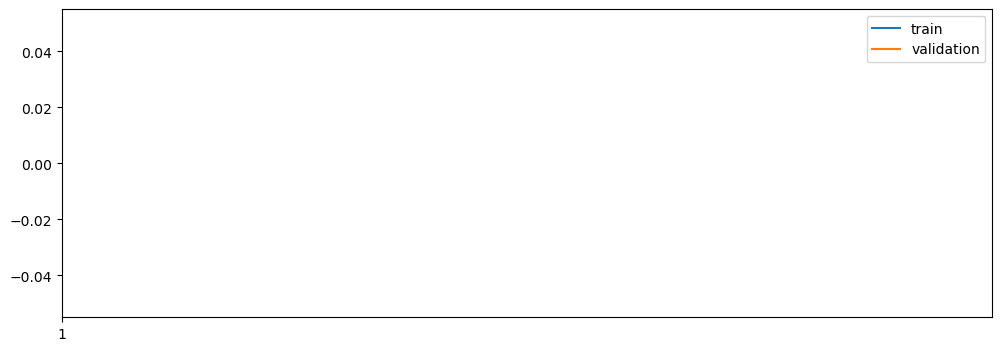

Epoch:1 Training Loss:nan Validation Loss:nan: 100%|██████████| 1/1 [23:28<00:00, 1408.86s/it]


In [14]:
epochs = 1
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./ICPRModelos3DUNET/GN_CROP/GN200FLAIR.pt")

In [15]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GN200FLAIR.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.23811681095486212
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4905, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [16]:
transform, transform_label=transform_normalization(200,False,1)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


In [17]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GN200T1.pt")

Epoch:100 Training Loss:0.4234753689458293 Validation Loss:0.780424403718605: 100%|██████████| 100/100 [1:32:03<00:00, 55.23s/it]


In [18]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GN200T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.04345455434032422
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [35]:
transform, transform_label=transform_normalization(200,False,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


In [20]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNMask200FLAIR.pt")

Epoch:100 Training Loss:0.29286297175192066 Validation Loss:0.45126101891554793: 100%|██████████| 100/100 [1:40:19<00:00, 60.19s/it]


In [21]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNMask200FLAIR.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.26441100439497905
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4856, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


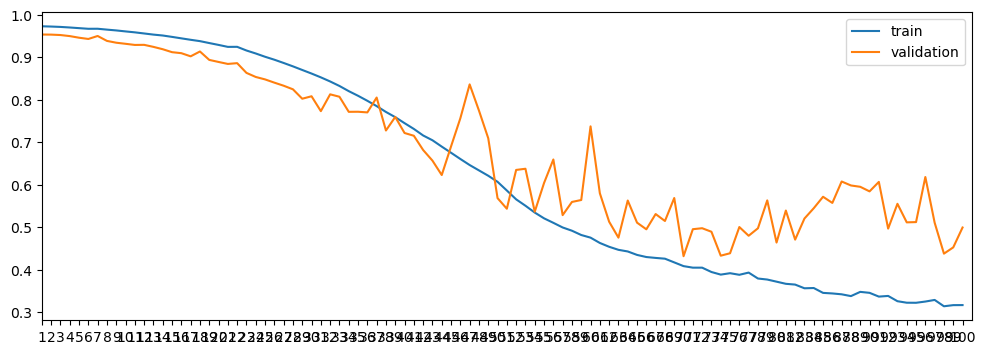

Epoch:100 Training Loss:0.31670676623621297 Validation Loss:0.499372016659702: 100%|██████████| 100/100 [1:38:28<00:00, 59.08s/it]


In [15]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNMask200FLAIRlr5.pt")

In [16]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNMask200FLAIRlr5.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.25842193120379786
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.5078, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


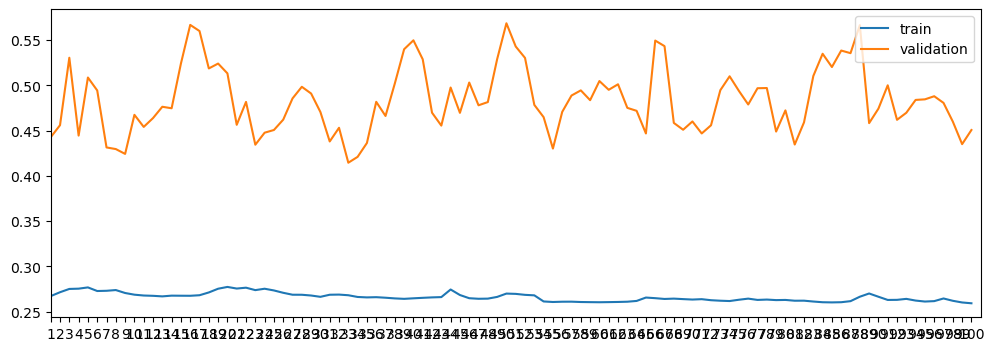

Epoch:100 Training Loss:0.25936153665665657 Validation Loss:0.45078058370388135: 100%|██████████| 100/100 [1:38:13<00:00, 58.94s/it]


In [37]:
epochs = 100
optim = Adam(model.parameters(), lr=0.000025)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNMask200FLAIRlr25.pt")

In [38]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNMask200FLAIRlr25.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.24201374563302747
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4412, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [17]:
transform, transform_label=transform_normalization(200,False,3)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


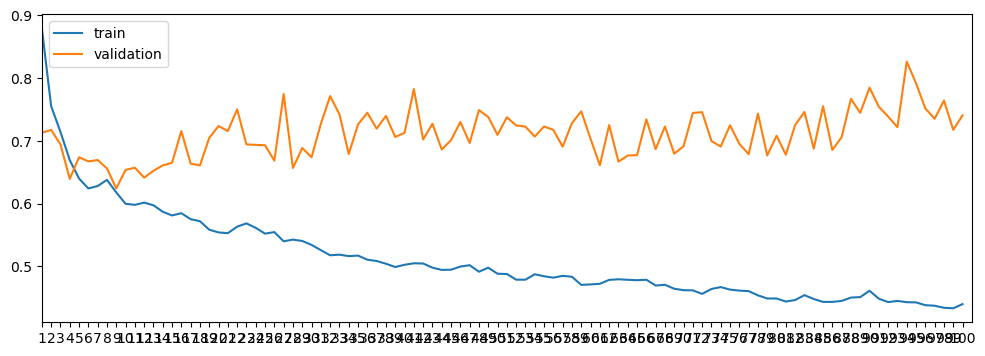

Epoch:100 Training Loss:0.4399926927781874 Validation Loss:0.7404410730862089: 100%|██████████| 100/100 [1:40:50<00:00, 60.51s/it]


In [23]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNMask200T1.pt")

In [24]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNMask200T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.0688130108066712
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [45]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


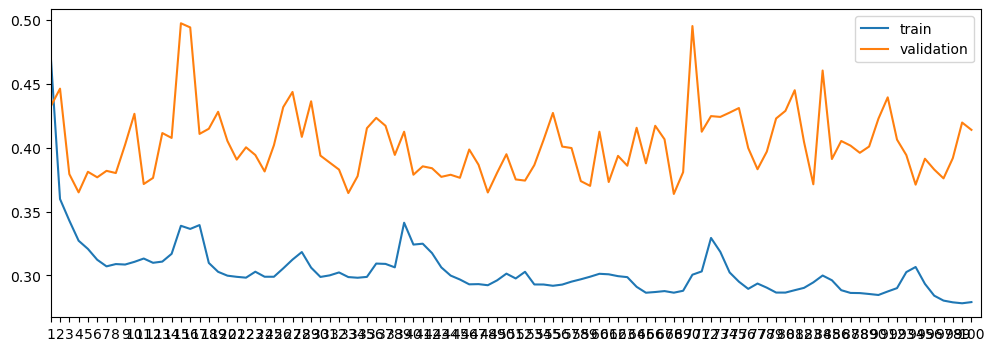

Epoch:100 Training Loss:0.27908094429200697 Validation Loss:0.413992434825192: 100%|██████████| 100/100 [1:48:53<00:00, 65.33s/it]


In [26]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNFill200FLAIR.pt")

In [27]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill200FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2608159403733321
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4465, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


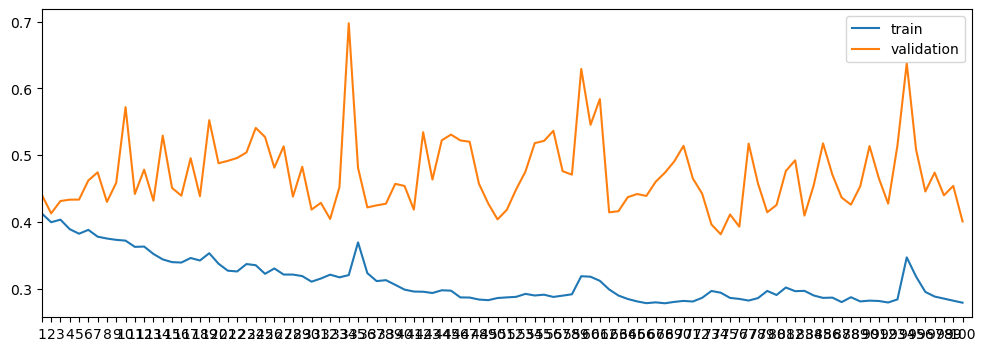

Epoch:100 Training Loss:0.27912723787369265 Validation Loss:0.4008403038375942: 100%|██████████| 100/100 [1:45:18<00:00, 63.18s/it]


In [19]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-5)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNFill200FLAIRlr5.pt")

In [20]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill200FLAIRlr5.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.25071541899447575
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4830, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


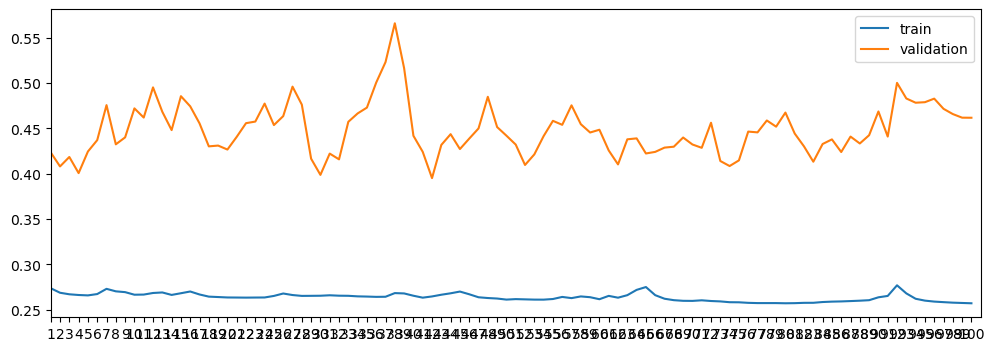

Epoch:100 Training Loss:0.2572452868184736 Validation Loss:0.4617286666092455: 100%|██████████| 100/100 [1:44:57<00:00, 62.97s/it]


In [48]:
epochs = 100
optim = Adam(model.parameters(), lr=0.000025)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNFill200FLAIRlr25.pt")

In [49]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill200FLAIRlr25.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


Dice coefficient: 0.2494325383921693
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4404, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


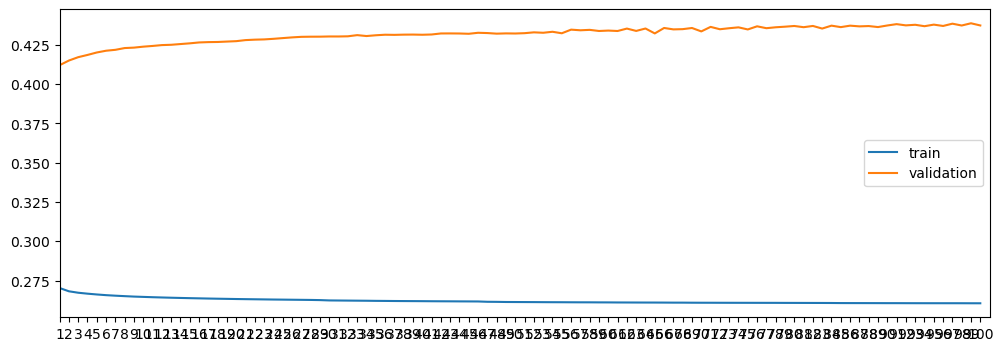

Epoch:100 Training Loss:0.26050961825155444 Validation Loss:0.4372812542207636: 100%|██████████| 100/100 [1:48:37<00:00, 65.17s/it]


In [41]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-6)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNFill200FLAIRlr6.pt")

In [42]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill200FLAIRlr6.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2458113025592052
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4419, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [28]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


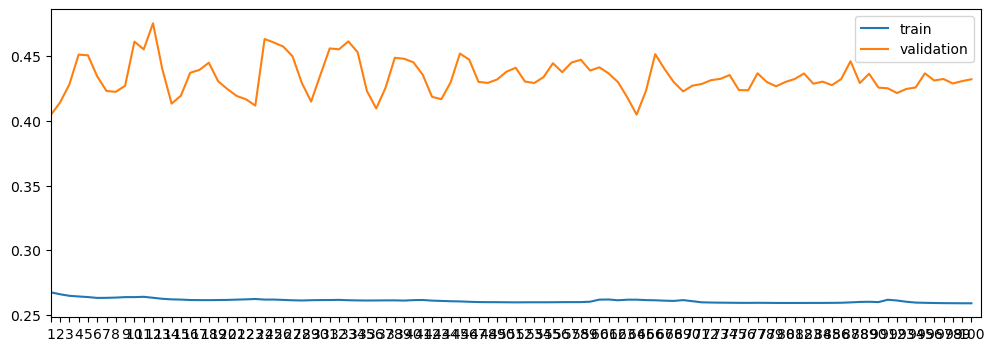

Epoch:100 Training Loss:0.258955640562119 Validation Loss:0.4321463387588719: 100%|██████████| 100/100 [1:49:20<00:00, 65.61s/it]


In [43]:
epochs = 100
optim = Adam(model.parameters(), lr=1e-5)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/GN_CROP/GNFill200T1.pt")

In [44]:
model=assignPretrainedModel(device,"./Modelos3DUNET/GN_CROP/GNFill200T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.24785200695164109
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4457, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


## Min max Normalization 200x200 crop and pad

In [11]:
model = UNet(in_channels=1,out_channels=1, init_features=32, is200pad=False,is200crop=True)
model = model.to(device)

In [58]:
transform, transform_label=transform_normalization(200,False,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,30,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


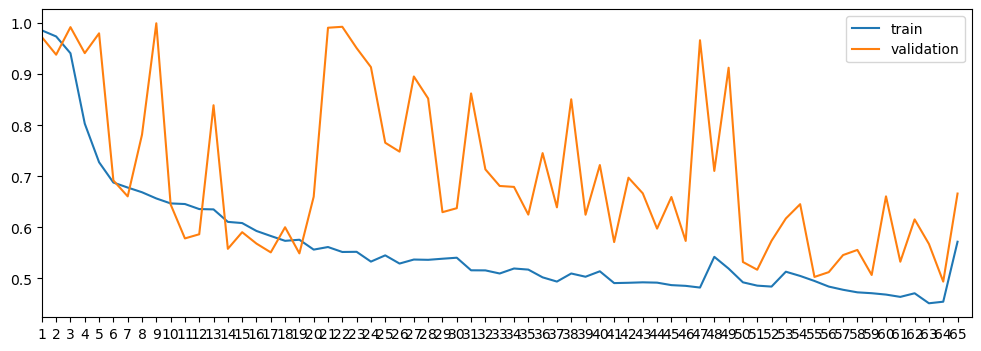

Epoch:65 Training Loss:0.5718105840377319 Validation Loss:0.6662439229897247: 100%|██████████| 65/65 [59:23<00:00, 54.83s/it]


In [54]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MM200Flair.pt")

In [55]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MM200Flair.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.10152727189078609
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3189, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


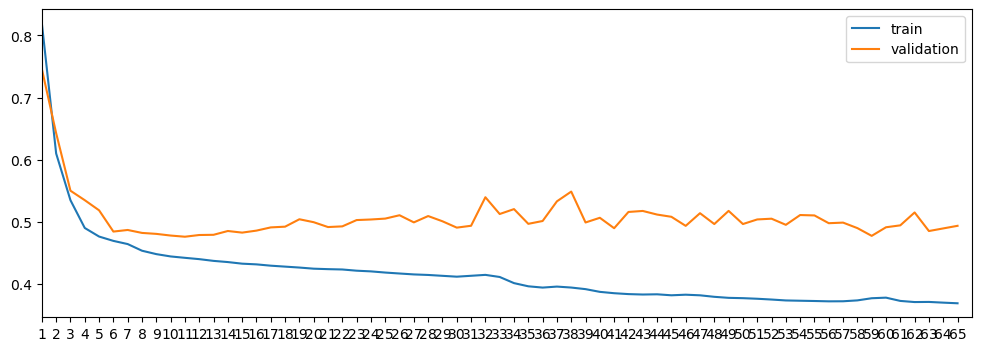

Epoch:65 Training Loss:0.36862096419701207 Validation Loss:0.49338240324984967: 100%|██████████| 65/65 [59:22<00:00, 54.81s/it]


In [59]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MM200Flairlr4.pt")

In [60]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MM200Flairlr4.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.10583968562170508
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3357, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [12]:
transform, transform_label=transform_normalization(200,False,2)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


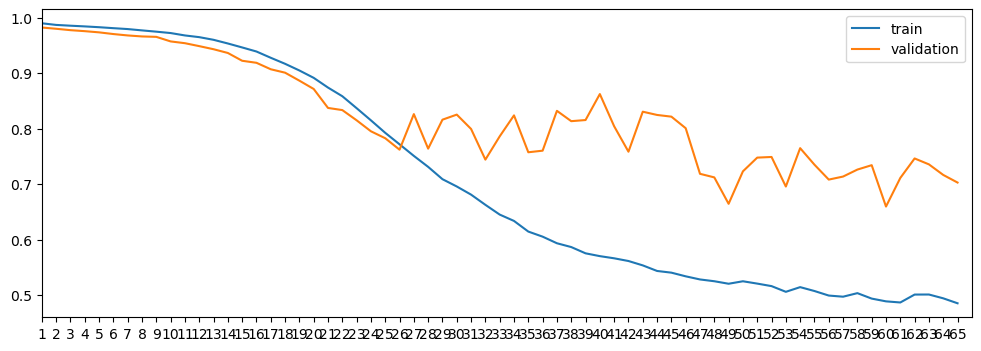

Epoch:65 Training Loss:0.48556286981028896 Validation Loss:0.7030031378050222: 100%|██████████| 65/65 [1:05:04<00:00, 60.07s/it]


In [13]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MM200T1.pt")

In [14]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MM200T1.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.05819158996455372
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [13]:
transform, transform_label=transform_normalization(200,False,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


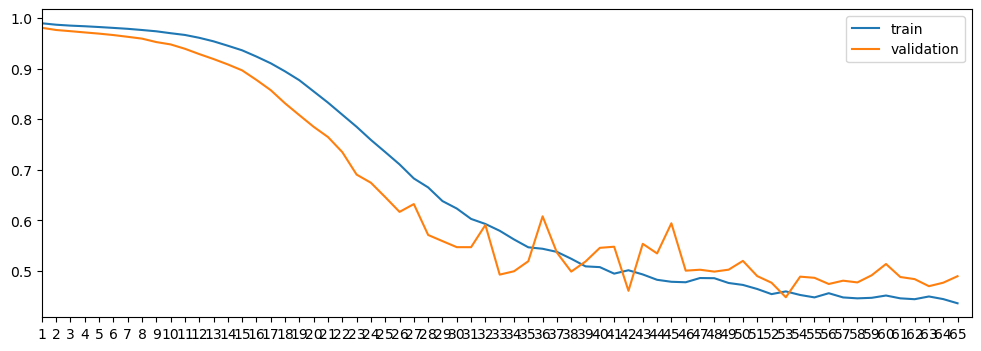

Epoch:65 Training Loss:0.4362668468106178 Validation Loss:0.48977083210407923: 100%|██████████| 65/65 [1:09:12<00:00, 63.89s/it]


In [16]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MMmask200Flair.pt")

In [14]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMmask200Flair.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.12397846115606004
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.4161, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [15]:
transform, transform_label=transform_normalization(200,False,4)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


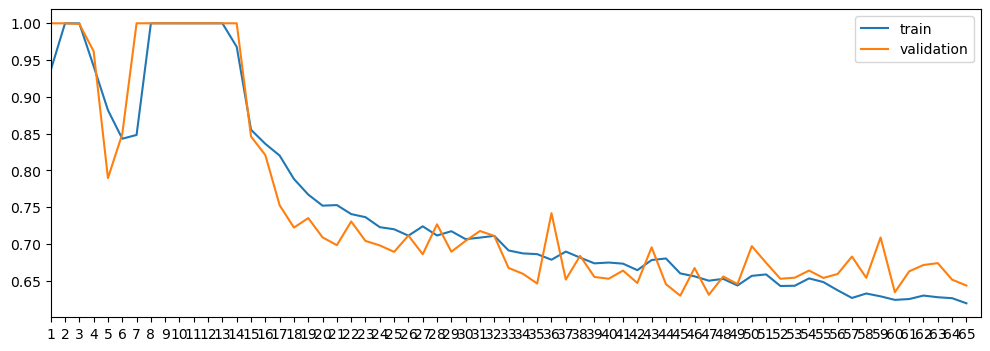

Epoch:65 Training Loss:0.6191130392013058 Validation Loss:0.6432378591282328: 100%|██████████| 65/65 [1:12:07<00:00, 66.58s/it]


In [16]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-3)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MMmask200T1.pt")

In [17]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMmask200T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.10005704366271138
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [18]:
transform, transform_label=transform_normalization(200,False,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsFLAIR",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


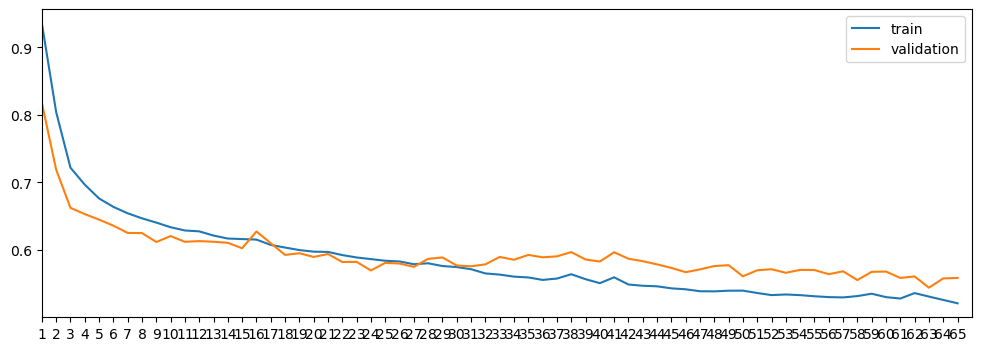

Epoch:65 Training Loss:0.5209195140869387 Validation Loss:0.5584565613969749: 100%|██████████| 65/65 [1:17:37<00:00, 71.65s/it]


In [19]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MMFill200FLAIR.pt")

In [20]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMFill200FLAIR.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.07399291187206185
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(0.3026, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [21]:
transform, transform_label=transform_normalization(200,False,6)
train_data,val_data,train_dl,val_dl = dataLoaders("pathsT1",train,val,transform, transform_label,False,15,True)
test_data=Slices(TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label,True)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


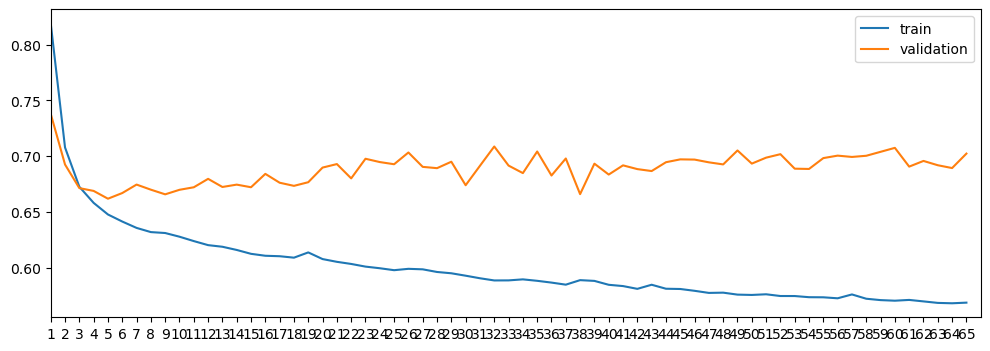

Epoch:65 Training Loss:0.5689073866413485 Validation Loss:0.7023591004382496: 100%|██████████| 65/65 [1:17:31<00:00, 71.57s/it]


In [22]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/MM_CROP/MMFill200T1.pt")

In [23]:
model=assignPretrainedModel(device,"./Modelos3DUNET/MM_CROP/MMFill200T1.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.07218365718853371
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


# Modelos Con Concatenate

Se ha seleccionado inicialmente crop de 240 y normalizacion fill brain gaussian

In [31]:
transform, transform_label=transform_normalization(200,False,6)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsFLAIR","pathsT1",train,val,transform, transform_label,False,10)
test_data=Concatenate(TEST_DICT.get("pathsFLAIR"),TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


In [14]:
model = UNet(in_channels=2, out_channels=1, init_features=32, is200pad=True,is200crop=False)
model=model.to(device)

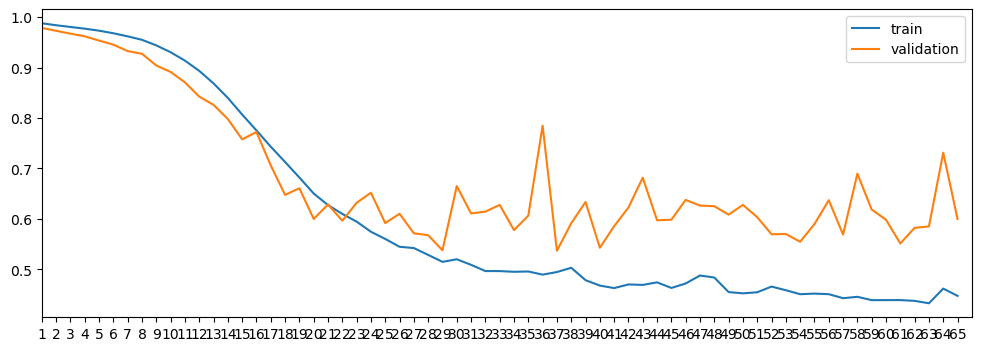

Epoch:65 Training Loss:0.44740277117696303 Validation Loss:0.5998626616339877: 100%|██████████| 65/65 [58:10<00:00, 53.70s/it]


In [29]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate.pt")

In [30]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.09575304456306376
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [32]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsFLAIR","pathsT1",train,val,transform, transform_label,False,10)
test_data=Concatenate(TEST_DICT.get("pathsFLAIR"),TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


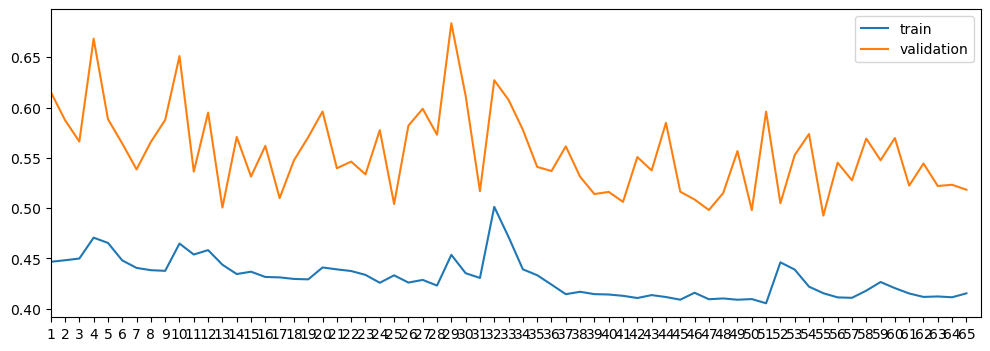

Epoch:65 Training Loss:0.4153523499081875 Validation Loss:0.5183513617816112: 100%|██████████| 65/65 [59:25<00:00, 54.86s/it]


In [34]:
epochs = 65
optim = Adam(model.parameters(), lr=1e-4)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate2.pt")

In [35]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate2.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.1063643262422901
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [37]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsFLAIR","pathsT1",train,val,transform, transform_label,False,10)
test_data=Concatenate(TEST_DICT.get("pathsFLAIR"),TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


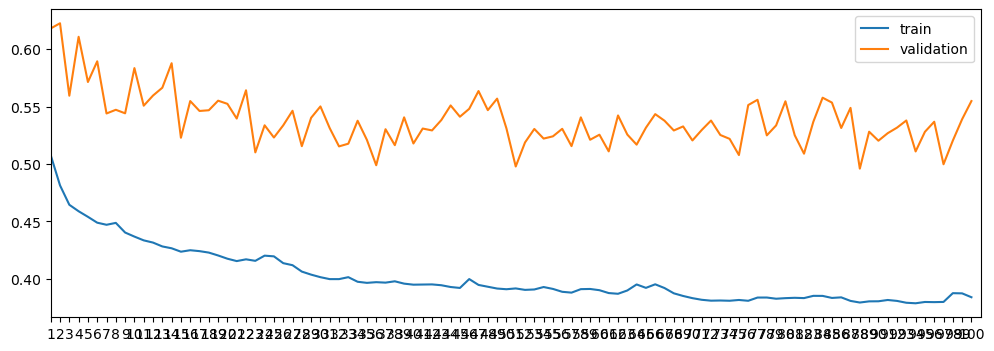

Epoch:100 Training Loss:0.3840605912023577 Validation Loss:0.5548373559311973: 100%|██████████| 100/100 [1:32:35<00:00, 55.56s/it]


In [39]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate3.pt")

In [40]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate3.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.23365248197897975
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [11]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsFLAIR","pathsT1",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsFLAIR"),TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:127: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


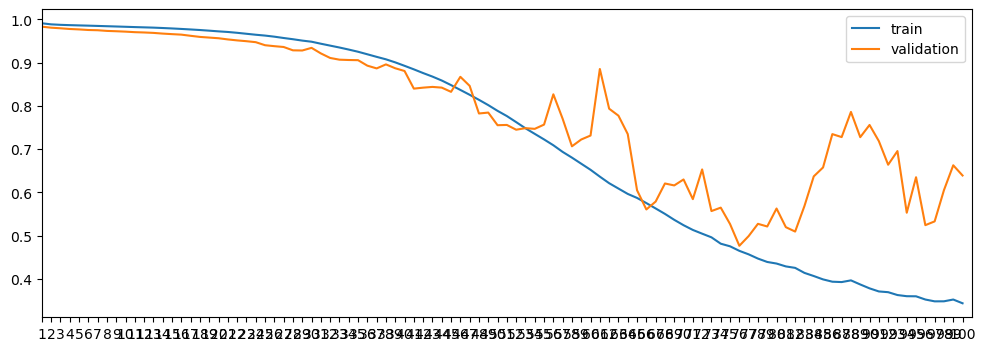

Epoch:100 Training Loss:0.34410551094239755 Validation Loss:0.6392843927587747: 100%|██████████| 100/100 [1:29:11<00:00, 53.52s/it]


In [16]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate4.pt")

In [17]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate4.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.2688994384940567
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [18]:
model = UNet(in_channels=2, out_channels=1, init_features=48, is200pad=True,is200crop=False)
model=model.to(device)

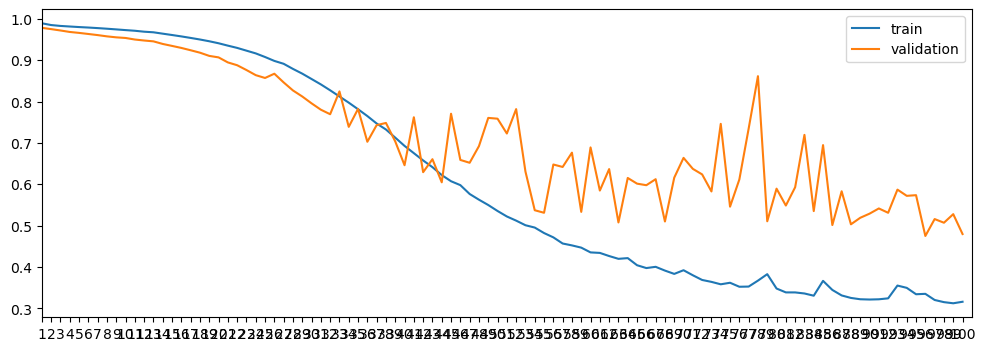

Epoch:100 Training Loss:0.31585907974550803 Validation Loss:0.4795849488497869: 100%|██████████| 100/100 [2:49:05<00:00, 101.45s/it]


In [19]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate5.pt")

In [20]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate5.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.191385708409239
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [33]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsFLAIR","pathsT1",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsFLAIR"),TEST_DICT.get("pathsT1"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


In [34]:
model = UNet(in_channels=2, out_channels=1, init_features=24, is200pad=True,is200crop=False)
model=model.to(device)

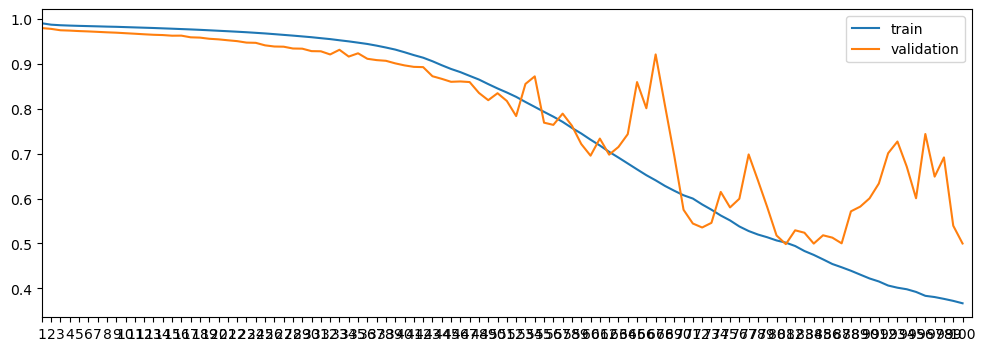

Epoch:100 Training Loss:0.3665787281528596 Validation Loss:0.49986682791980913: 100%|██████████| 100/100 [1:08:15<00:00, 40.96s/it]


In [19]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate6.pt")

In [20]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate6.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.2388294410995992
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


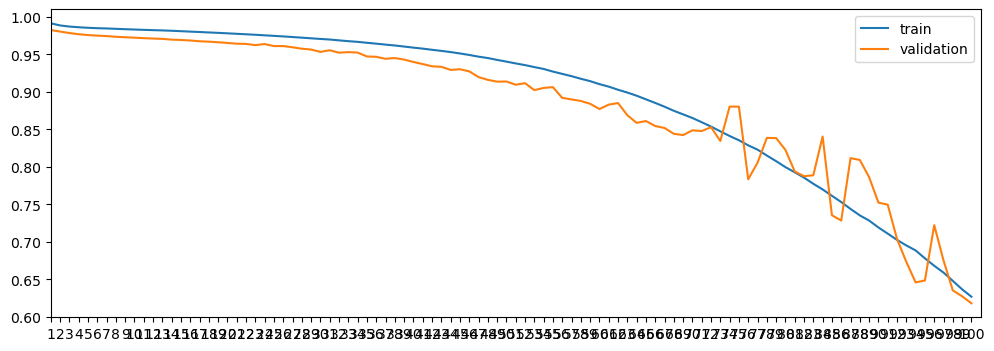

Epoch:100 Training Loss:0.6270727865157589 Validation Loss:0.6183084196609984: 100%|██████████| 100/100 [1:09:20<00:00, 41.60s/it]


In [28]:
epochs = 100
optim = Adam(model.parameters(), lr=0.000035)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenatelr35.pt")

In [37]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenatelr35.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.25929120642402653
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


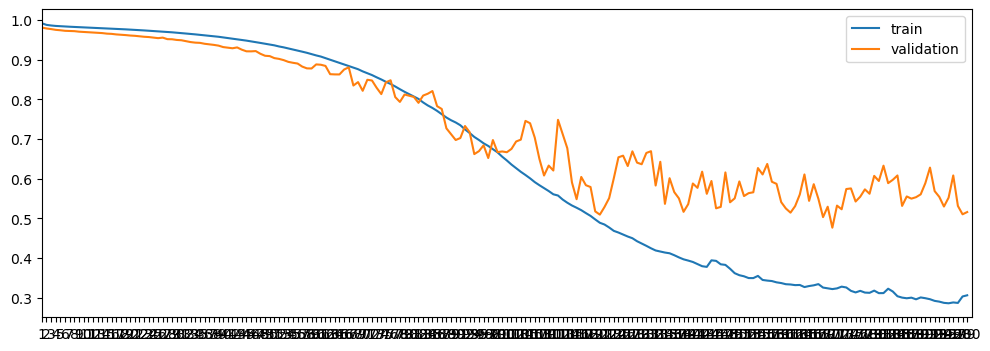

Epoch:200 Training Loss:0.30585549146898333 Validation Loss:0.5157658383288042: 100%|██████████| 200/200 [2:20:42<00:00, 42.21s/it]


In [35]:
epochs = 200
optim = Adam(model.parameters(), lr=0.000035)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenatelr35200.pt")

In [36]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenatelr35200.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.2386824700858836
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


In [21]:
model = UNet(in_channels=2, out_channels=1, init_features=28, is200pad=True,is200crop=False)
model=model.to(device)

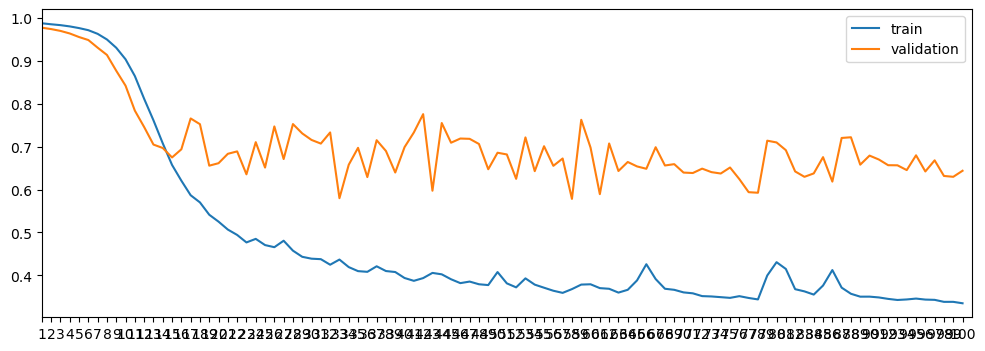

Epoch:100 Training Loss:0.33467684253569574 Validation Loss:0.6440009159885224: 100%|██████████| 100/100 [1:21:25<00:00, 48.85s/it]


In [23]:
epochs = 100
optim = Adam(model.parameters(), lr=0.0002)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenate7.pt")

In [24]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate7.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.11130156785917567
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


Al revés

In [35]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


In [38]:
model = UNet(in_channels=2, out_channels=1, init_features=24, is200pad=True,is200crop=False)
model=model.to(device)

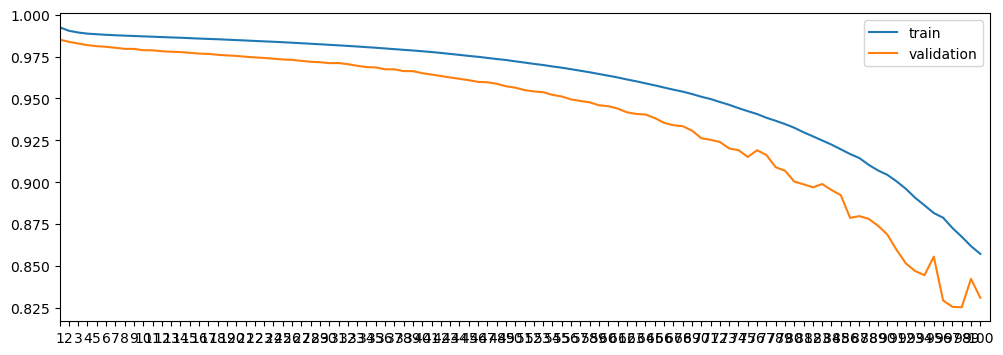

Epoch:100 Training Loss:0.857198134545357 Validation Loss:0.8310173613800645: 100%|██████████| 100/100 [1:10:06<00:00, 42.06s/it]


In [17]:
epochs = 100
optim = Adam(model.parameters(), lr=0.000035)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenategirado.pt")

In [18]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenategirado.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.2494180664726484
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


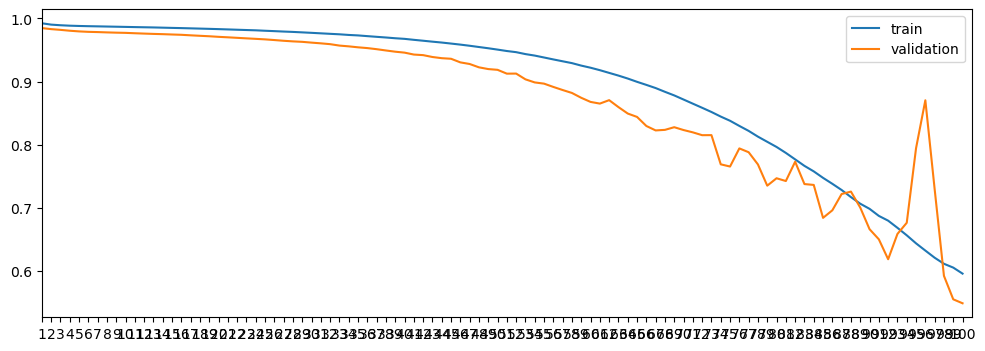

Epoch:100 Training Loss:0.5960471049431831 Validation Loss:0.5490892739983699: 100%|██████████| 100/100 [1:10:05<00:00, 42.06s/it]


In [32]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenategirado5.pt")

In [33]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenategirado5.pt")
calculate_metrics(model,test_dl, device)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:333: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\monai\metrics\utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Dice coefficient: 0.26818787829925944
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


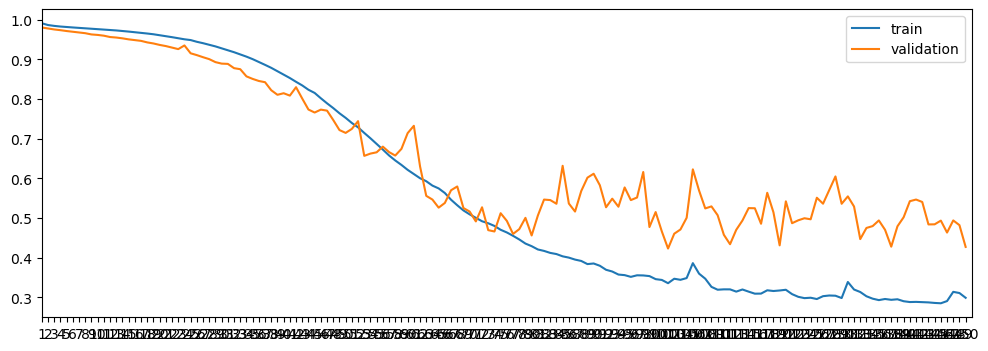

Epoch:150 Training Loss:0.2988047130646244 Validation Loss:0.4270965111080604: 100%|██████████| 150/150 [1:47:49<00:00, 43.13s/it]


In [39]:
epochs = 150
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenategirado150.pt")

In [40]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenategirado150.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.24737430181550352
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


shuffled y girado

In [41]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,True,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

2311
514


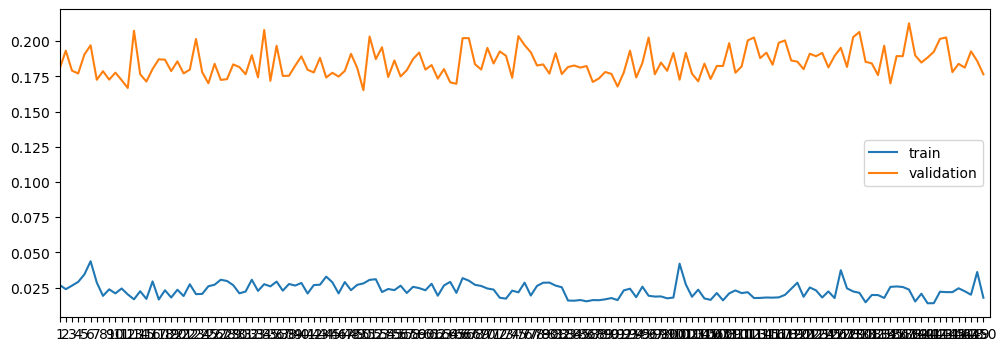

Epoch:150 Training Loss:0.01788729198517338 Validation Loss:0.17638464077147123: 100%|██████████| 150/150 [1:46:14<00:00, 42.50s/it]


In [45]:
epochs = 150
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/Concatenateshuffled.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenateshuffled.pt")
calculate_metrics(model,test_dl, device)

Dice coefficient: 0.26161049787004137
IOU: tensor(nan, device='cuda:0')
Hausdorff Distance: tensor(inf)
Precision: tensor(nan, device='cuda:0')
Recall: tensor(nan, device='cuda:0')
Accuracy: tensor(nan, device='cuda:0')


# Data Augmentation

- Rotation (-15,15)
- Scale (0.9,1.1)
- Shearing(-18,18)


(-0.5, 217.5, 181.5, -0.5)

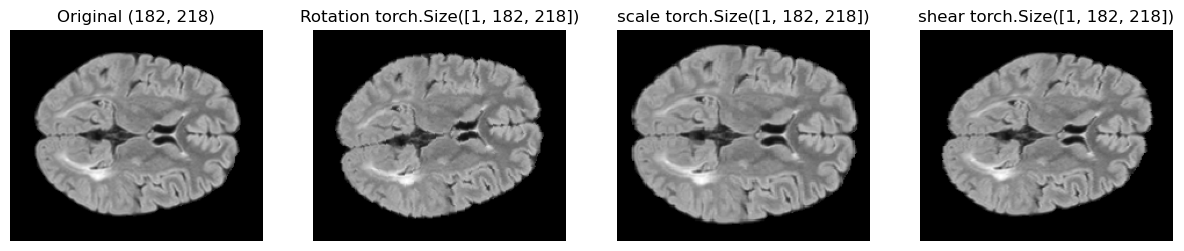

In [12]:
fig,axs = plt.subplots(1, 4, figsize=(15,5))
flair= os.path.join(TRAINING_PATH,"P1","T1","P1_T1_FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,80]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')

image_rot,_=dataAugmentation(image_data[:, :, 80],image_data[:, :, 80],(-15,15),None,None)
axs[1].imshow(image_rot.squeeze(0), cmap='gray')
axs[1].set_title("Rotation %s" %(image_rot.shape,))
axs[1].axis('off')

image_scale,_=dataAugmentation(image_data[:, :, 80],image_data[:, :, 80],(0,0),(0.9,1.1),None)
axs[2].imshow(image_scale.squeeze(0), cmap='gray')
axs[2].set_title("scale %s" %(image_scale.shape,))
axs[2].axis('off')

image_she,_=dataAugmentation(image_data[:, :, 80],image_data[:, :, 80],(0,0),None,(-18,18))
axs[3].imshow(image_she.squeeze(0), cmap='gray')
axs[3].set_title("shear %s" %(image_she.shape,))
axs[3].axis('off')

(-0.5, 217.5, 181.5, -0.5)

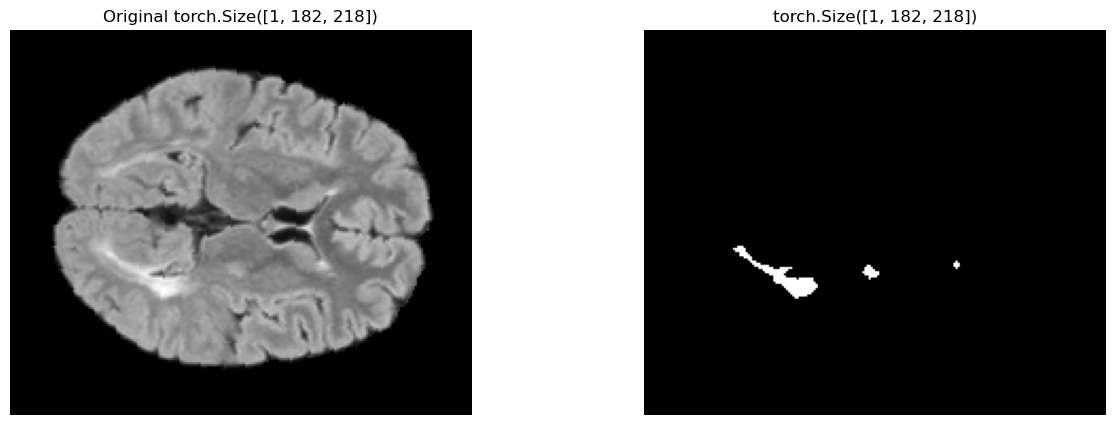

In [17]:
fig,axs = plt.subplots(1, 2, figsize=(15,5))
flair= os.path.join(TRAINING_PATH,"P1","T1","P1_T1_FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
flairData=image_data[:, :,80]

mask= os.path.join(TRAINING_PATH,"P1","T1","P1_T1_MASK.nii.gz")
img = nibabel.load(mask)
image_data = img.get_fdata() 
maskData=image_data[:, :,80]
flairData,maskData = dataAugmentation(flairData,maskData,(-15,15), None, None)
axs[0].imshow(flairData.squeeze(0), cmap='gray')
axs[0].set_title("Original %s" %(flairData.shape,))
axs[0].axis('off')


axs[1].imshow(maskData.squeeze(0), cmap='gray')
axs[1].set_title("%s" %(maskData.shape,))
axs[1].axis('off')

- 200 CROP
- GAUSSIAN NORMALIZATION FILL
- FEATURES 24
- 100-150 epochs

In [9]:
model = UNet(in_channels=2, out_channels=1, init_features=24, is200pad=True,is200crop=False)
model=model.to(device)

In [43]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)

c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPRpreprocessing.py:134: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


10681


KeyboardInterrupt: 

In [ ]:
import preprocessing as pre
transform, transform_label=transform_normalization(200,False,1)
train_data = pre.Augmentation(train.get("pathsFLAIR"),train.get("pathsT1"),train.get("mask"), transform, transform_label,1000)
train_dl = DataLoader(train_data, batch_size=15, shuffle=False)

In [29]:
print(len(train_data.images))

11681


In [32]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000.pt")

  0%|          | 0/100 [03:00<?, ?it/s]


KeyboardInterrupt: 

In [33]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA1000.pt")
calculate_metrics(model,test_dl, device)

NameError: name 'test_dl' is not defined

In [ ]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
images, masks = generateAugmentation(train_data,2000)
train_data2 = Augmentation(images, masks)
train_data = ConcatDataset([train_data,train_data2])
train_dl = DataLoader(train_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA2000.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA2000.pt")
calculate_metrics(model,test_dl, device)

In [52]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
images, masks = generateAugmentation(train_data,3000)
train_data2 = Augmentation(images, masks)
train_data = ConcatDataset([train_data,train_data2])
train_dl = DataLoader(train_data, batch_size=15, shuffle=False)

2311
514


c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\preprocessing.py:128: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std=torch.std(image[brain==1])


IndexError: list index out of range

In [ ]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA3000.pt")
calculate_metrics(model,test_dl, device)

In [ ]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
images, masks = generateAugmentation(train_data,4000)
train_data2 = Augmentation(images, masks)
train_data = ConcatDataset([train_data,train_data2])
train_dl = DataLoader(train_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA4000.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA4000.pt")
calculate_metrics(model,test_dl, device)

In [ ]:
transform, transform_label=transform_normalization(200,False,5)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)
test_data=Concatenate(TEST_DICT.get("pathsT1"),TEST_DICT.get("pathsFLAIR"), TEST_DICT.get("mask"), transform, transform_label)
test_dl = DataLoader(test_data, batch_size=15, shuffle=False)
images, masks = generateAugmentation(train_data,5000)
train_data2 = Augmentation(images, masks)
train_data = ConcatDataset([train_data,train_data2])
train_dl = DataLoader(train_data, batch_size=15, shuffle=False)

In [ ]:
epochs = 100
optim = Adam(model.parameters(), lr=0.00005)
criterion = DiceLoss() 
min_loss=1000
traintestpipeline(epochs, optim, criterion, min_loss,"./Modelos3DUNET/DATA_AUGMENTATION/DA5000.pt")

In [ ]:
model=assignPretrainedModel(device,"./Modelos3DUNET/DATA_AUGMENTATION/DA5000.pt")
calculate_metrics(model,test_dl, device)

In [42]:
transform, transform_label=transform_normalization(240,False,1)
train_data,val_data,train_dl,val_dl = dataLoadersConcatenate("pathsT1","pathsFLAIR",train,val,transform, transform_label,False,15)

MemoryError: 

In [ ]:
def generador(loader):
    for data, target in loader:
        data, target = data.to(device).float(), target.float().to(device)
        yield data, target 
def showsegmentation(test_dl, mmodel):               
    with torch.no_grad():
        gen = generador(test_dl)

        data, true_labels = next(gen)

        mmodel.eval()

        output = mmodel(data)

        _,axs =plt.subplots(1,2)
        true_label=true_labels[0]
    

        axs[0].imshow(torch.squeeze(output[0]), cmap='gray')
        axs[0].set_title("Output")
        axs[1].imshow(true_label, cmap='gray')
        axs[1].set_title("Label Mask")
        
        plt.show()

In [34]:
model=assignPretrainedModel(device,"./Modelos3DUNET/Concatenate.pt")

RuntimeError: Error(s) in loading state_dict for UNet:
	size mismatch for encoder1.enc1conv1.weight: copying a param with shape torch.Size([32, 2, 3, 3]) from checkpoint, the shape in current model is torch.Size([24, 2, 3, 3]).
	size mismatch for encoder1.enc1norm1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for encoder1.enc1norm1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for encoder1.enc1norm1.running_mean: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for encoder1.enc1norm1.running_var: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for encoder1.enc1conv2.weight: copying a param with shape torch.Size([32, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([24, 24, 3, 3]).
	size mismatch for encoder1.enc1norm2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for encoder1.enc1norm2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for encoder1.enc1norm2.running_mean: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for encoder1.enc1norm2.running_var: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for encoder2.enc2conv1.weight: copying a param with shape torch.Size([64, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([48, 24, 3, 3]).
	size mismatch for encoder2.enc2norm1.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder2.enc2norm1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder2.enc2norm1.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder2.enc2norm1.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder2.enc2conv2.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([48, 48, 3, 3]).
	size mismatch for encoder2.enc2norm2.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder2.enc2norm2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder2.enc2norm2.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder2.enc2norm2.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for encoder3.enc3conv1.weight: copying a param with shape torch.Size([128, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([96, 48, 3, 3]).
	size mismatch for encoder3.enc3norm1.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for encoder3.enc3norm1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for encoder3.enc3norm1.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for encoder3.enc3norm1.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for encoder3.enc3conv2.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([96, 96, 3, 3]).
	size mismatch for encoder3.enc3norm2.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for encoder3.enc3norm2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for encoder3.enc3norm2.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for encoder3.enc3norm2.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for encoder4.enc4conv1.weight: copying a param with shape torch.Size([256, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([192, 96, 3, 3]).
	size mismatch for encoder4.enc4norm1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for encoder4.enc4norm1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for encoder4.enc4norm1.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for encoder4.enc4norm1.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for encoder4.enc4conv2.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([192, 192, 3, 3]).
	size mismatch for encoder4.enc4norm2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for encoder4.enc4norm2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for encoder4.enc4norm2.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for encoder4.enc4norm2.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for bottleneck.bottleneckconv1.weight: copying a param with shape torch.Size([512, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([384, 192, 3, 3]).
	size mismatch for bottleneck.bottlenecknorm1.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for bottleneck.bottlenecknorm1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for bottleneck.bottlenecknorm1.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for bottleneck.bottlenecknorm1.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for bottleneck.bottleneckconv2.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([384, 384, 3, 3]).
	size mismatch for bottleneck.bottlenecknorm2.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for bottleneck.bottlenecknorm2.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for bottleneck.bottlenecknorm2.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for bottleneck.bottlenecknorm2.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for upconv4.weight: copying a param with shape torch.Size([512, 256, 2, 2]) from checkpoint, the shape in current model is torch.Size([384, 192, 2, 2]).
	size mismatch for upconv4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for decoder4.dec4conv1.weight: copying a param with shape torch.Size([256, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([192, 384, 3, 3]).
	size mismatch for decoder4.dec4norm1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for decoder4.dec4norm1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for decoder4.dec4norm1.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for decoder4.dec4norm1.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for decoder4.dec4conv2.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([192, 192, 3, 3]).
	size mismatch for decoder4.dec4norm2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for decoder4.dec4norm2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for decoder4.dec4norm2.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for decoder4.dec4norm2.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for upconv3.weight: copying a param with shape torch.Size([256, 128, 2, 2]) from checkpoint, the shape in current model is torch.Size([192, 96, 2, 2]).
	size mismatch for upconv3.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for decoder3.dec3conv1.weight: copying a param with shape torch.Size([128, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([96, 192, 3, 3]).
	size mismatch for decoder3.dec3norm1.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for decoder3.dec3norm1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for decoder3.dec3norm1.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for decoder3.dec3norm1.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for decoder3.dec3conv2.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([96, 96, 3, 3]).
	size mismatch for decoder3.dec3norm2.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for decoder3.dec3norm2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for decoder3.dec3norm2.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for decoder3.dec3norm2.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([96]).
	size mismatch for upconv2.weight: copying a param with shape torch.Size([128, 64, 2, 2]) from checkpoint, the shape in current model is torch.Size([96, 48, 2, 2]).
	size mismatch for upconv2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder2.dec2conv1.weight: copying a param with shape torch.Size([64, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([48, 96, 3, 3]).
	size mismatch for decoder2.dec2norm1.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder2.dec2norm1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder2.dec2norm1.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder2.dec2norm1.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder2.dec2conv2.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([48, 48, 3, 3]).
	size mismatch for decoder2.dec2norm2.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder2.dec2norm2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder2.dec2norm2.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for decoder2.dec2norm2.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for upconv1.weight: copying a param with shape torch.Size([64, 32, 2, 2]) from checkpoint, the shape in current model is torch.Size([48, 24, 2, 2]).
	size mismatch for upconv1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for decoder1.dec1conv1.weight: copying a param with shape torch.Size([32, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([24, 48, 3, 3]).
	size mismatch for decoder1.dec1norm1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for decoder1.dec1norm1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for decoder1.dec1norm1.running_mean: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for decoder1.dec1norm1.running_var: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for decoder1.dec1conv2.weight: copying a param with shape torch.Size([32, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([24, 24, 3, 3]).
	size mismatch for decoder1.dec1norm2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for decoder1.dec1norm2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for decoder1.dec1norm2.running_mean: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for decoder1.dec1norm2.running_var: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for conv.weight: copying a param with shape torch.Size([1, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 24, 1, 1]).

In [ ]:
showsegmentation(val_dl)